## Final Project Submission

Please fill out: 
* Student name: Virgilia Antonucci and Makonnen Sharpe
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Joseph Mata
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

# Business Problem

Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

We must load relevant libraries and the datasets

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

First step is to look through the data.

In [3]:
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
# Making sure the 'domestic_gross' and 'foreign_gross' columns are numeric
movie_gross['domestic_gross'] = pd.to_numeric(movie_gross['domestic_gross'], errors='coerce')
movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'], errors='coerce')

# Creating the 'total_gross' column by adding the two columns

movie_gross['total_gross'] = movie_gross['domestic_gross'] + movie_gross['foreign_gross']
movie_gross.head(10)

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08
6,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08
7,Tangled,BV,200800000.0,391000000.0,2010,5.918000e+08
8,Despicable Me,Uni.,251500000.0,291600000.0,2010,5.431000e+08
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010,4.949000e+08


In [5]:
top_20_rows_gross = movie_gross.nlargest(20, 'total_gross')
top_20_rows_gross

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09


In [6]:
rows_with_nans = movie_gross[movie_gross.isnull().any(axis=1)]
print(rows_with_nans)

                                       title      studio  domestic_gross  \
210            Outside the Law (Hors-la-loi)         NaN         96900.0   
222                                  Flipped          WB       1800000.0   
230               It's a Wonderful Afterlife         UTV             NaN   
254   The Polar Express (IMAX re-issue 2010)          WB        673000.0   
267                           Tiny Furniture         IFC        392000.0   
...                                      ...         ...             ...   
3382                               The Quake       Magn.          6200.0   
3383             Edward II (2018 re-release)          FM          4800.0   
3384                                El Pacto        Sony          2500.0   
3385                                The Swan  Synergetic          2400.0   
3386                       An Actor Prepares       Grav.          1700.0   

      foreign_gross  year  total_gross  
210       3300000.0  2010    3396900.0  
222  

In [7]:
movie_gross = movie_gross.dropna()

In [8]:
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')

movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [9]:
# Replacing 'zippedData/rt.reviews.tsv.gz' with the actual file path
file_path = 'zippedData/rt.reviews.tsv.gz'

# Reading the TSV file into a Pandas DataFrame with 'latin1' encoding
reviews = pd.read_csv(file_path, delimiter='\t', encoding='latin1')

reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [10]:
reviews = reviews.dropna()

In [11]:
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')

tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [12]:
budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [13]:
conn = sqlite3.connect('zippedData/im.db')

In [14]:
query = "SELECT * FROM sqlite_master"

df = pd.read_sql(query, conn)

df.head()

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."


In [15]:
query = "SELECT * FROM sqlite_master"

df = pd.read_sql(query, conn)

df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [16]:
def set_nulls_to_unknown(db_path):
    # Connect to the SQLite database
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()
    
    # Get the list of tables in the database
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = [table[0] for table in cursor.fetchall()]
    
    for table in tables:
        # Get columns of the table
        cursor.execute(f"PRAGMA table_info({table});")
        columns = [column[1] for column in cursor.fetchall()]  # index 1 is for the column name
        
        # Update each column setting NULL to 'unknown'
        for col in columns:
            cursor.execute(f"UPDATE {table} SET {col} = 'unknown' WHERE {col} IS NULL;")
        
        conn.commit()
    
    conn.close()

# Call the function with your SQLite database path
set_nulls_to_unknown('zippedData/im.db')

In [17]:
# Making sure the above code worked

def check_nulls(db_path):
    # Connect to the SQLite database
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()
    
    # Get the list of tables in the database
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = [table[0] for table in cursor.fetchall()]

    for table in tables:
        # Get columns of the table
        cursor.execute(f"PRAGMA table_info({table});")
        columns = [column[1] for column in cursor.fetchall()]

        # Check each column for NULL values
        for col in columns:
            cursor.execute(f"SELECT COUNT(*) FROM {table} WHERE {col} IS NULL;")
            null_count = cursor.fetchone()[0]
            
            if null_count > 0:
                print(f"Table '{table}', Column '{col}' has {null_count} NULL values.")
            else:
                print("No nulls, bestie!")
    
    conn.close()

# Call the function with your SQLite database path
check_nulls('zippedData/im.db')

No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!


Now we'll go and clean specific tables.

# SQL

In [18]:
%%bash
sqlite3 zippedData/im.db
.schema

CREATE TABLE IF NOT EXISTS "movie_basics" (
"movie_id" TEXT,
  "primary_title" TEXT,
  "original_title" TEXT,
  "start_year" INTEGER,
  "runtime_minutes" REAL,
  "genres" TEXT
);
CREATE TABLE IF NOT EXISTS "directors" (
"movie_id" TEXT,
  "person_id" TEXT
);
CREATE TABLE IF NOT EXISTS "known_for" (
"person_id" TEXT,
  "movie_id" TEXT
);
CREATE TABLE IF NOT EXISTS "movie_akas" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "title" TEXT,
  "region" TEXT,
  "language" TEXT,
  "types" TEXT,
  "attributes" TEXT,
  "is_original_title" REAL
);
CREATE TABLE IF NOT EXISTS "movie_ratings" (
"movie_id" TEXT,
  "averagerating" REAL,
  "numvotes" INTEGER
);
CREATE TABLE IF NOT EXISTS "persons" (
"person_id" TEXT,
  "primary_name" TEXT,
  "birth_year" REAL,
  "death_year" REAL,
  "primary_profession" TEXT
);
CREATE TABLE IF NOT EXISTS "principals" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "person_id" TEXT,
  "category" TEXT,
  "job" TEXT,
  "characters" TEXT
);
CREATE TABLE IF NOT EXISTS "writers" (
"m

In [19]:
query = """

WITH HighlyRatedMovies AS (
    SELECT mr.movie_id
    FROM movie_ratings mr
    WHERE mr.averagerating > 8
),

ActorsInHighlyRatedMovies AS (
    SELECT kf.person_id, p.primary_name
    FROM known_for kf
    JOIN HighlyRatedMovies hrm ON kf.movie_id = hrm.movie_id
    JOIN persons p ON kf.person_id = p.person_id
)

SELECT primary_name, COUNT(*) as appearances
FROM ActorsInHighlyRatedMovies
GROUP BY primary_name
HAVING COUNT(*) > 1;

"""

best_actors = pd.read_sql(query, conn)

best_actors


,primary_name,appearances
0,A'Jai Simone,2
1,Aadha Sur,2
2,Aakash Dahiya,2
3,Aalaap Majgavkar,2
4,Aarif Sheikh,2
...,...,...
3368,Zygmunt Bauman,2
3369,Ádám Majoros,4
3370,Óbis József,2
3371,Úlfur Teitur Traustason,2


In [20]:
query = """

WITH HighlyRatedMovies AS (
    SELECT mr.movie_id
    FROM movie_ratings mr
    WHERE mr.averagerating > 8
),

ActorsInHighlyRatedMovies AS (
    SELECT kf.person_id, p.primary_name
    FROM known_for kf
    JOIN HighlyRatedMovies hrm ON kf.movie_id = hrm.movie_id
    JOIN persons p ON kf.person_id = p.person_id
)

SELECT primary_name, COUNT(*) as appearances
FROM ActorsInHighlyRatedMovies
GROUP BY primary_name
HAVING COUNT(*) > 1;

"""

best_actors = pd.read_sql(query, conn)

best_actors

,primary_name,appearances
0,A'Jai Simone,2
1,Aadha Sur,2
2,Aakash Dahiya,2
3,Aalaap Majgavkar,2
4,Aarif Sheikh,2
...,...,...
3368,Zygmunt Bauman,2
3369,Ádám Majoros,4
3370,Óbis József,2
3371,Úlfur Teitur Traustason,2


In [21]:
best_actors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3373 entries, 0 to 3372
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   primary_name  3373 non-null   object
 1   appearances   3373 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 52.8+ KB


In [22]:
best_actors= best_actors.sort_values(by='appearances', ascending=True)

In [23]:
best_actors

,primary_name,appearances
0,A'Jai Simone,2
2120,Michael Shimkus,2
2121,Michael Stavrakakis,2
2122,Michael Truong,2
2123,Michael Turner,2
...,...,...
3071,Thanos Tsantas,4
1520,Jon Anderson,5
3301,Yan Li,5
404,Bing Wang,6


In [24]:
best_actor_series = best_actors.set_index('primary_name')['appearances']

In [25]:
best_actor_series[best_actor_series == best_actor_series.max()]

primary_name
Bing Wang    6
Shi Chen     6
Name: appearances, dtype: int64

In [26]:
best_actors.tail(5)

,primary_name,appearances
3071,Thanos Tsantas,4
1520,Jon Anderson,5
3301,Yan Li,5
404,Bing Wang,6
2866,Shi Chen,6


<Figure size 1000x800 with 0 Axes>

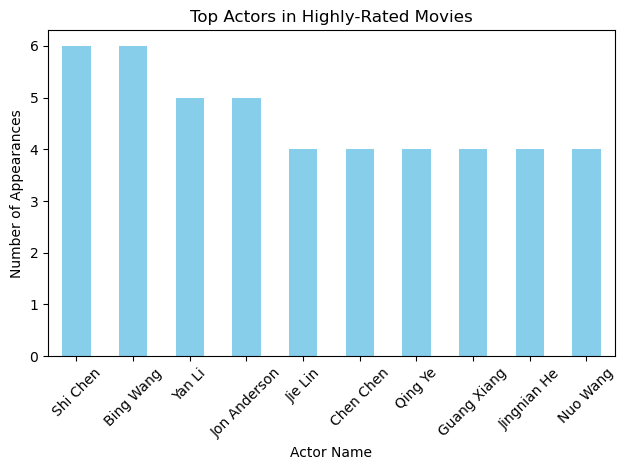

In [27]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'appearances' in descending order to get the top actors at the top
best_actors_sorted = best_actors.sort_values(by='appearances', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(10, 8))  # Adjust the figure size based on the number of actors
best_actors_sorted.head(10).plot(x='primary_name', y='appearances', kind='bar', legend=False, color='skyblue')
plt.title('Top Actors in Highly-Rated Movies')
plt.ylabel('Number of Appearances')
plt.xlabel('Actor Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Budgets

In [28]:
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [29]:
budgets['production_budget'] = budgets['production_budget'].str.replace('[$,]', '', regex=True).astype(float)

In [30]:
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace('[$,]', '', regex=True).astype(float)

In [31]:
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace('[$,]', '', regex=True).astype(float)

In [32]:
budgets['release_date'] = pd.to_datetime(budgets['release_date'], format='%b %d, %Y')

In [33]:
budgets['production_budget'] = pd.to_numeric(budgets['production_budget'], errors='coerce')

print(budgets.head())

   id release_date                                        movie  \
0   1   2009-12-18                                       Avatar   
1   2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2   3   2019-06-07                                 Dark Phoenix   
3   4   2015-05-01                      Avengers: Age of Ultron   
4   5   2017-12-15            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross  
0        425000000.0     760507625.0     2.776345e+09  
1        410600000.0     241063875.0     1.045664e+09  
2        350000000.0      42762350.0     1.497624e+08  
3        330600000.0     459005868.0     1.403014e+09  
4        317000000.0     620181382.0     1.316722e+09  


In [34]:
movie_info_sorted_by_bred = budgets.sort_values(by='production_budget', ascending=True)

movie_info_sorted_by_bred.reset_index(drop=True, inplace=True)
movie_info_sorted_by_bred.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,82,2005-08-05,My Date With Drew,1100.0,181041.0,181041.0
1,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.0
2,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1338.0
3,79,1999-04-02,Following,6000.0,48482.0,240495.0
4,77,2004-12-31,The Mongol King,7000.0,900.0,900.0


In [35]:
movie_info_sorted_by_date = budgets.sort_values(by='release_date', ascending=True)

movie_info_sorted_by_date.reset_index(drop=True, inplace=True)
movie_info_sorted_by_date.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,30,2019-12-31,Reagan,25000000.0,0.0,0.0
5778,13,2019-12-31,Rogue City,13000000.0,0.0,0.0
5779,36,2020-02-21,Call of the Wild,82000000.0,0.0,0.0
5780,6,2020-12-31,Hannibal the Conqueror,50000000.0,0.0,0.0
5781,95,2020-12-31,Moonfall,150000000.0,0.0,0.0


In [36]:
movie_info_sorted_by_world = budgets.sort_values(by='worldwide_gross', ascending=True)

movie_info_sorted_by_world.reset_index(drop=True, inplace=True)
movie_info_sorted_by_world.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,38,2019-04-23,Living Dark: The Story of Ted the Caver,1750000.0,0.0,0.0
1,76,2015-05-15,Pound of Flesh,7500000.0,0.0,0.0
2,28,2011-06-28,2:13,3500000.0,0.0,0.0
3,29,2013-01-29,"Batman: The Dark Knight Returns, Part 2",3500000.0,0.0,0.0
4,48,2019-06-21,Burn Your Maps,8000000.0,0.0,0.0


In [37]:
budgets.describe()

,id,release_date,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5782,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,2004-07-06 05:20:31.546177792,3.158776e+07,4.187333e+07,9.148746e+07
min,1.000000,1915-02-08 00:00:00,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,2000-04-22 18:00:00,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,2007-03-02 00:00:00,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,2012-12-25 00:00:00,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,2020-12-31 00:00:00,4.250000e+08,9.366622e+08,2.776345e+09
std,28.821076,NaN,4.181208e+07,6.824060e+07,1.747200e+08


In [38]:
movie_info_sorted = budgets.sort_values(by=['domestic_gross', 'worldwide_gross'], ascending=False)

top_ten_gross_data = movie_info_sorted.head(6)

# fig, ax = plt.subplots()

# top_ten_gross_data[['domestic_gross', 'worldwide_gross']].plot(kind='bar', ax=ax)
# plt.title('Comparison of Top Ten Domestic Gross and Worldwide Gross')
# plt.xlabel('Movie Index')
# plt.ylabel('Gross (in billions)')

# for i, row in top_ten_gross_data.iterrows():
#     ax.annotate(row['movie'], (i, row['domestic_gross']), ha='center', fontsize=10, rotation=45, xytext=(0, 5), textcoords='offset points')

# plt.legend(['Domestic Gross', 'Worldwide Gross'])


In [39]:
# fig, ax = plt.subplots()
# top_ten_gross_data[['domestic_gross', 'worldwide_gross']].plot(kind='bar', ax=ax)

# ax.set_title('Comparison of Top Ten Domestic Gross and Worldwide Gross')
# plt.tight_layout()


In [40]:
pg_df = top_ten_gross_data[['movie','domestic_gross', 'worldwide_gross']].set_index('movie')

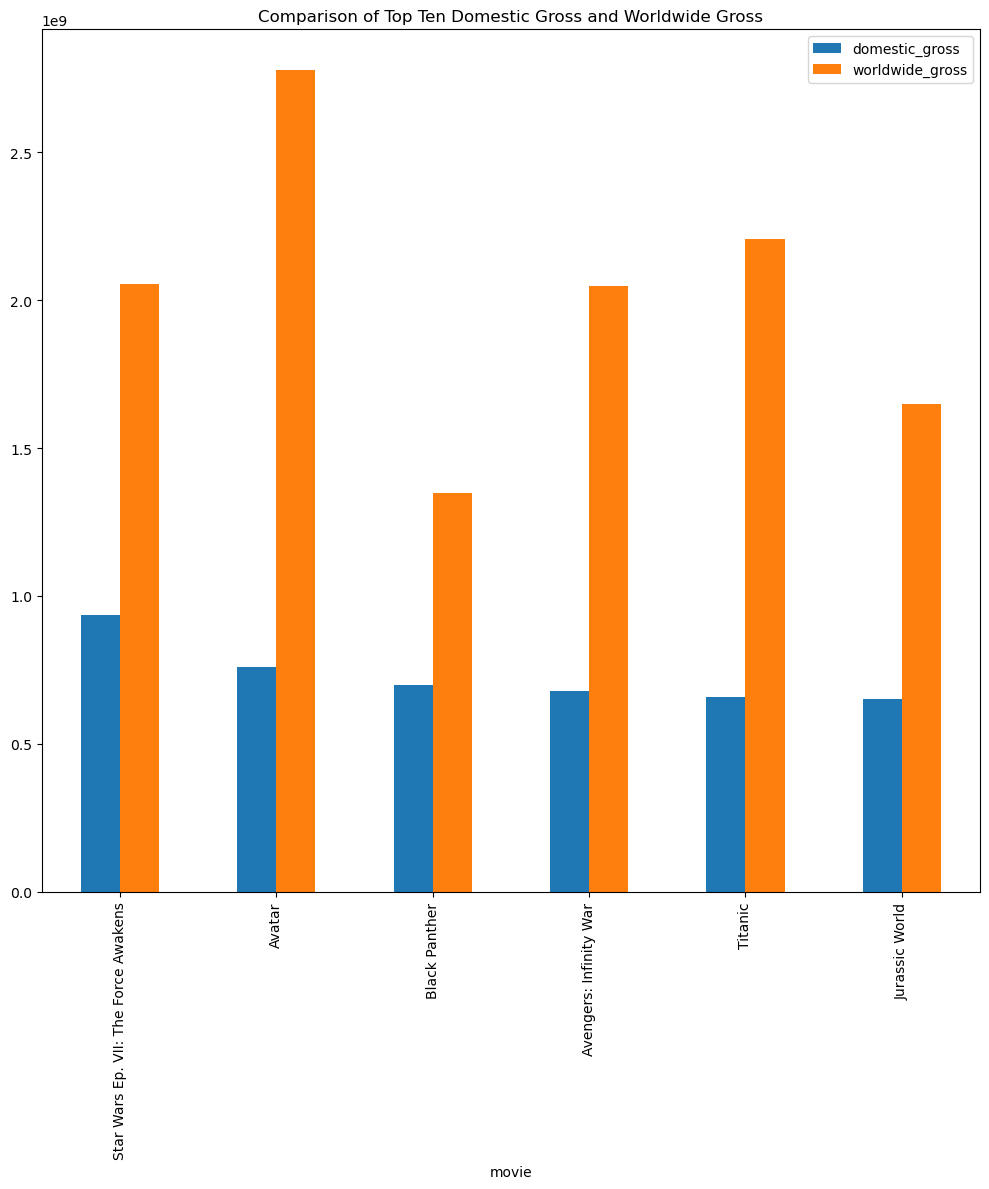

In [41]:
fig, ax = plt.subplots(figsize = (10,12))
pg_df[['domestic_gross', 'worldwide_gross']].plot(kind='bar', ax=ax)

ax.set_title('Comparison of Top Ten Domestic Gross and Worldwide Gross')
plt.tight_layout()

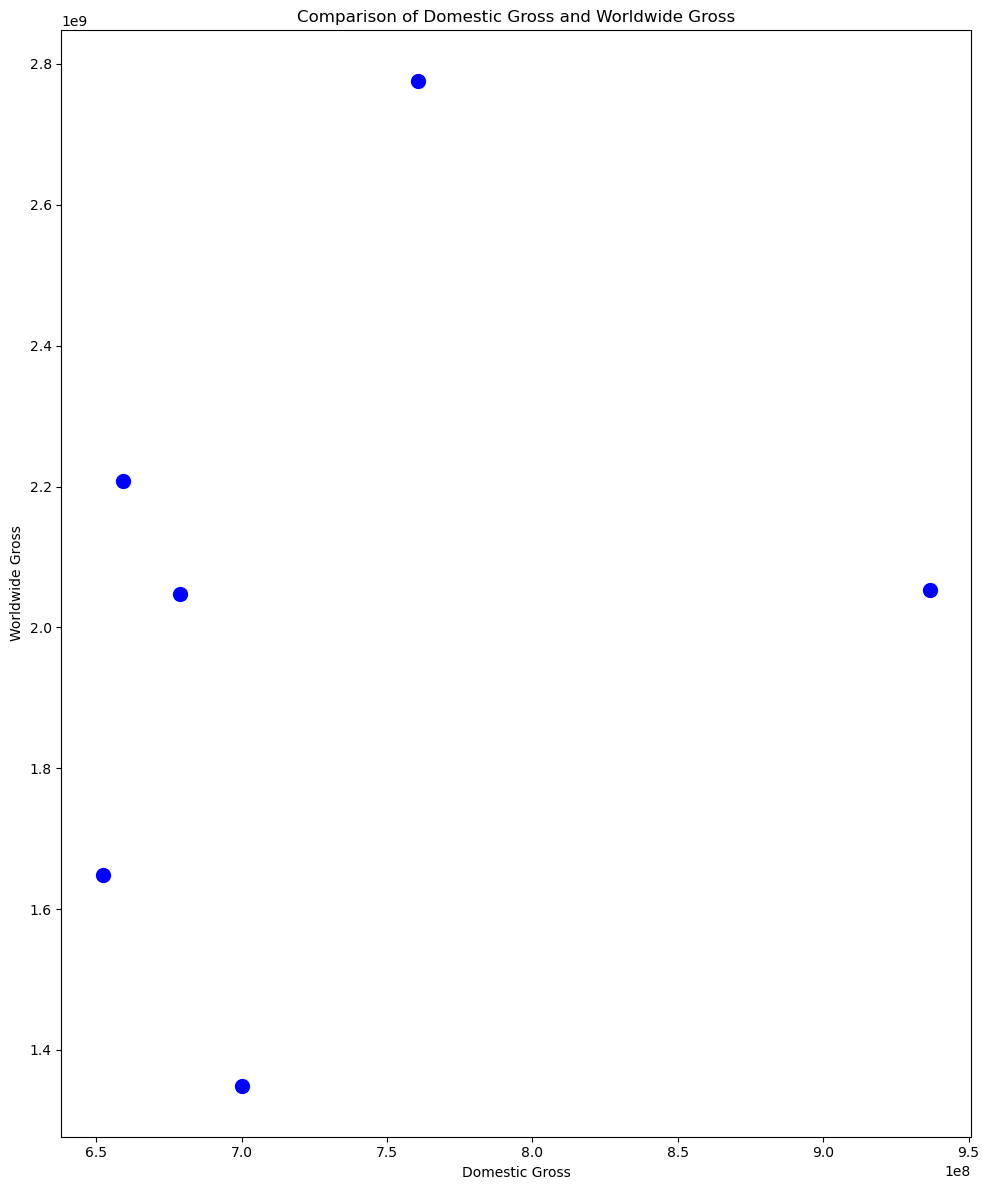

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,12))
pg_df.plot(x='domestic_gross', y='worldwide_gross', kind='scatter', ax=ax, s=100, color='blue')

ax.set_title('Comparison of Domestic Gross and Worldwide Gross')
ax.set_xlabel('Domestic Gross')
ax.set_ylabel('Worldwide Gross')
plt.tight_layout()
plt.show()


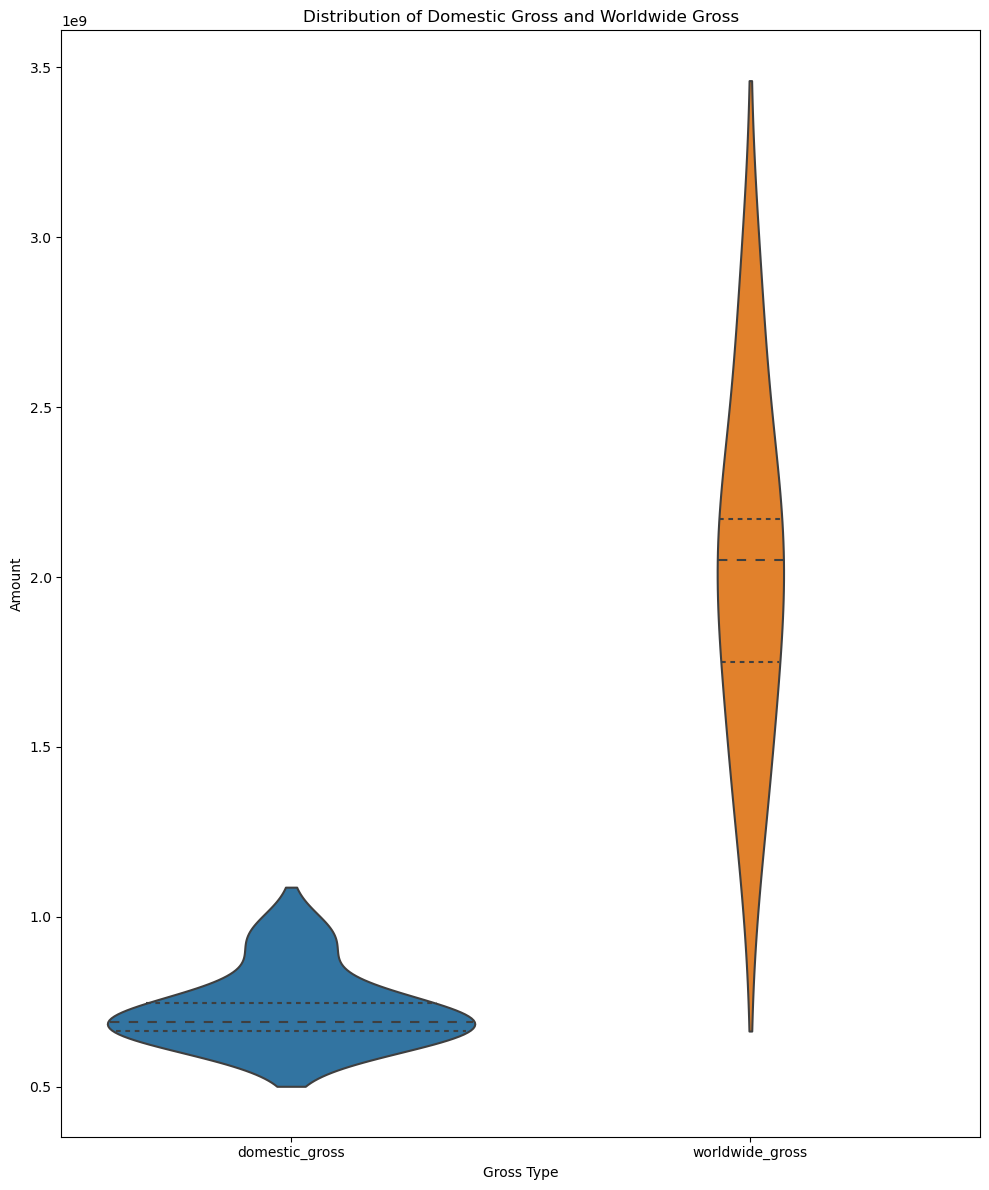

In [43]:
import seaborn as sns

# Reshaping the dataframe for violin plot
df_melted = pg_df.melt(value_vars=['domestic_gross', 'worldwide_gross'], 
                       var_name='Gross Type', value_name='Amount')

plt.figure(figsize=(10,12))
sns.violinplot(x='Gross Type', y='Amount', data=df_melted, inner="quartile")

plt.title('Distribution of Domestic Gross and Worldwide Gross')
plt.tight_layout()
plt.show()


# TMBD movies

Cleaning the next table.

In [44]:
tmdb_movies.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [45]:
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [46]:
null_counts = tmdb_movies.isnull().sum()
null_counts

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [47]:
pop = tmdb_movies.sort_values(by='popularity', ascending=True)

pop.reset_index(drop=True, inplace=True)
pop.tail()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
26513,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
26514,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
26515,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
26516,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948


In [48]:
vote = tmdb_movies.sort_values(by='vote_count', ascending=True)

vote.reset_index(drop=True, inplace=True)
vote.head(20)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,13258,[99],403294,en,9/11: Simulations,0.6,2014-07-04,9/11: Simulations,10.0,1
1,13386,[],493666,en,Addiction: This Is Not a Love Story,0.6,2014-11-20,Addiction: This Is Not a Love Story,8.0,1
2,13387,"[10402, 35]",477565,en,Batmetal,0.6,2014-01-07,Batmetal,8.0,1
3,13389,"[99, 18, 53]",464296,en,Vegas Vikings,0.6,2014-12-06,Vegas Vikings,8.0,1
4,13390,"[99, 10402]",456923,en,Rise of a Texas Bluesman: Stevie Ray Vaughan 1...,0.6,2014-09-09,Rise of a Texas Bluesman: Stevie Ray Vaughan 1...,8.0,1
5,13392,"[18, 10402, 10770]",431039,vi,Paris by night 112,0.6,2014-12-21,Paris by night 112,8.0,1
6,13394,"[878, 18]",428930,en,Drink,0.6,2014-01-01,Drink,8.0,1
7,13395,[],424817,en,Chestnut Street,0.6,2014-01-01,Chestnut Street,8.0,1
8,13385,"[14, 53, 36]",498113,en,"Afflicted, Inc.",0.6,2014-03-24,"Afflicted, Inc.",8.0,1
9,13396,[],424812,en,Emulsion Electrons Imbued,0.6,2014-01-01,Emulsion Electrons Imbued,8.0,1


In [49]:
tmdb_movies.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [50]:
tmdb_movies['vote_count'].median()

5.0

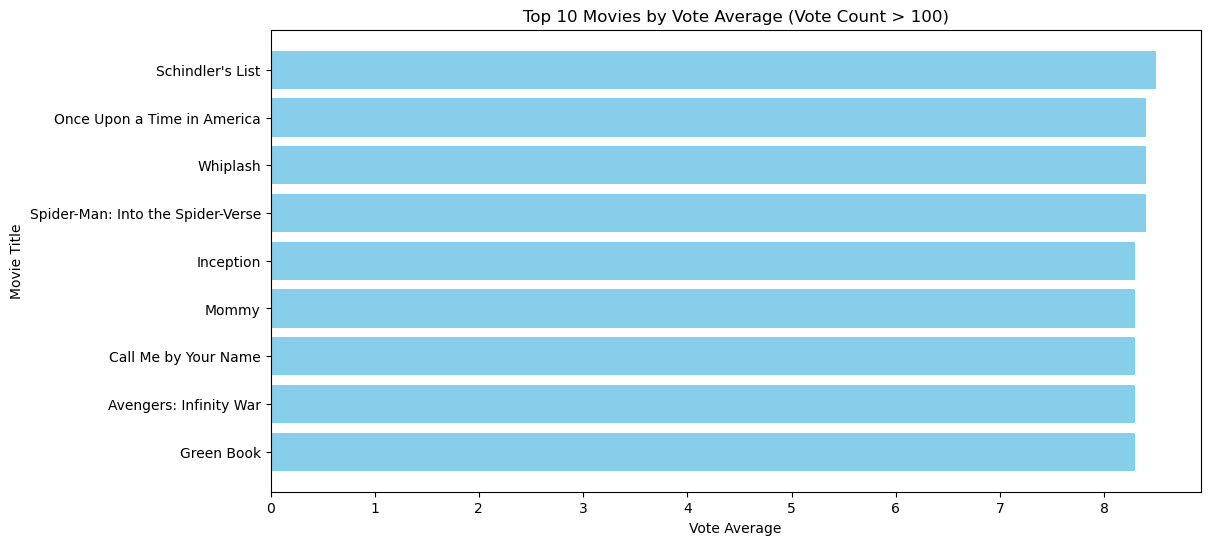

In [51]:
filtered_movies = tmdb_movies[(tmdb_movies['vote_count'] > 1000) & (tmdb_movies['original_language'] == 'en')]

# Sort the filtered DataFrame by 'vote_average' in descending order and take the top 10
top_10_movies = filtered_movies.nlargest(10, 'vote_average')

# Create a bar plot for the top 10 movies
plt.figure(figsize=(12, 6))
plt.barh(top_10_movies['original_title'], top_10_movies['vote_average'], color='skyblue')
plt.xlabel('Vote Average')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies by Vote Average (Vote Count > 100)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest vote_average at the top
plt.show()

In [52]:
filtered_movies = tmdb_movies[tmdb_movies['vote_count'] > 1000 & (tmdb_movies['original_language'] == 'en')]
filtered_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


# Movie info

Yet another table to clean...

In [53]:
movie_info['currency'].fillna('$', inplace=True)

movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",$,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",$,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",$,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,$,NaN,200 minutes,NaN


In [54]:
movie_info_cleaned = movie_info.dropna(subset=['genre', 'rating'])

movie_info_cleaned.reset_index(drop=True, inplace=True)
movie_info_cleaned.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",$,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",$,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",$,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,$,NaN,200 minutes,NaN


In [55]:
movie_info_cleaned['dvd_date'] = pd.to_datetime(movie_info_cleaned['dvd_date'], format='%b %d, %Y')

/var/folders/1f/98thg_p17ml4vwvv3m9xpp380000gn/T/ipykernel_12662/3006772974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_info_cleaned['dvd_date'] = pd.to_datetime(movie_info_cleaned['dvd_date'], format='%b %d, %Y')


In [56]:
movie_info_cleaned['theater_date'] = pd.to_datetime(movie_info_cleaned['theater_date'], format='%b %d, %Y')

/var/folders/1f/98thg_p17ml4vwvv3m9xpp380000gn/T/ipykernel_12662/3503527468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_info_cleaned['theater_date'] = pd.to_datetime(movie_info_cleaned['theater_date'], format='%b %d, %Y')


In [57]:
movie_info_cleaned.isnull().sum()

id                 0
synopsis          57
rating             0
genre              0
director         192
writer           442
theater_date     351
dvd_date         351
currency           0
box_office      1212
runtime           26
studio          1058
dtype: int64

In [58]:
movie_info_cleaned.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,$,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,$,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,$,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaT,NaT,$,NaN,200 minutes,NaN


In [59]:
movie_info_cleaned['dvd_date'].min()

Timestamp('1987-04-15 00:00:00')

In [60]:
movie_info_cleaned.loc[10]

id                                                             18
synopsis        In 1979, Bill Viola and Frank Caliguri dreamed...
rating                                                         NR
genre                                                 Documentary
director                                                      NaN
writer                                               Robert Zullo
theater_date                                                  NaT
dvd_date                                                      NaT
currency                                                        $
box_office                                                    NaN
runtime                                                       NaN
studio                                 Showtime Documentary Films
Name: 10, dtype: object

In [61]:
movie_info_cleaned.head(12)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,$,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,$,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,$,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaT,NaT,$,NaN,200 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,2000-03-03,2000-07-11,$,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,2002-01-11,2002-06-18,$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,2006-04-27,2007-10-02,$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,2010-06-30,2010-11-09,$,"134,904",117 minutes,NaN
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,1995-06-09,1999-07-27,$,NaN,108 minutes,NaN


In [62]:
movie_info_cleaned['dvd_date'].max()

Timestamp('2019-02-05 00:00:00')

In [63]:
movie_info_cleaned.loc[10, 'director'] = 'Henry Roosevelt, W.B. Zullo'

In [64]:
movie_info_cleaned.loc[1125, 'synopsis'] = 'Knock Off'

In [65]:
movie_info_cleaned['genre'].value_counts().head(20)

genre
Drama                                               151
Comedy                                              110
Comedy|Drama                                         80
Drama|Mystery and Suspense                           67
Art House and International|Drama                    62
Action and Adventure|Drama                           42
Action and Adventure|Drama|Mystery and Suspense      40
Drama|Romance                                        35
Comedy|Romance                                       32
Art House and International|Comedy|Drama             31
Horror                                               31
Action and Adventure|Science Fiction and Fantasy     24
Comedy|Drama|Romance                                 23
Classics|Drama                                       21
Action and Adventure|Mystery and Suspense            20
Action and Adventure                                 19
Classics|Drama|Mystery and Suspense                  18
Horror|Mystery and Suspense               

In [66]:
drama_movies = movie_info_cleaned[movie_info_cleaned['genre'].str.contains('drama', case=False)]
drama_movies

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,$,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,$,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,$,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaT,NaT,$,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1543,1991,Popular rap group Run DMC stars as a trio of p...,R,Action and Adventure|Drama,Rick Rubin,Rick Rubin|Ric Menello,NaT,NaT,$,NaN,92 minutes,NaN
1544,1992,"The title character, played by John Turturro, ...",R,Comedy|Drama,Joel Coen,Joel Coen|Ethan Coen,1991-08-21,2003-05-20,$,NaN,116 minutes,NaN
1549,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,1962-01-01,2004-05-11,$,NaN,111 minutes,NaN
1550,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,1993-04-01,2002-01-29,$,NaN,101 minutes,NaN


In [67]:
movie_info_cleaned.sort_values(by='synopsis', ascending=True)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
676,871,"""Another basement, another elevator...how can ...",R,Action and Adventure|Mystery and Suspense,Renny Harlin,NaN,1990-07-02,1999-03-09,$,NaN,124 minutes,NaN
450,596,"""Arctic Tale"" is an epic adventure that explor...",G,Documentary|Special Interest,Adam Ravetch|Sarah Robertson,Linda Woolverton|Mose Richards|Kristin Gore,2007-08-17,2017-08-01,$,"598,103",86 minutes,Paramount Vantage
1417,1837,"""Becoming Jane,"" is the story of the great, un...",PG,Drama|Romance,Julian Jarrold,Sarah Williams|Kevin Hood,2007-08-03,2008-02-12,$,"18,602,895",120 minutes,Miramax Films
1454,1881,"""Bicentennial Man,"" follows the life and times...",PG,Comedy|Drama|Science Fiction and Fantasy,Chris Columbus,Nicholas Kazan,1999-12-17,2002-01-15,$,NaN,131 minutes,Buena Vista Pictures
66,85,"""Boys Town"" goes to turn-of-the-century St. Lo...",NR,Drama,Ted Tetzlaff,Martin Rackin|Frank Davis,NaT,NaT,$,NaN,92 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1309,1700,NaN,NR,Drama,Loc Do,NaN,NaT,NaT,$,NaN,119 minutes,NaN
1335,1735,NaN,NR,Art House and International|Drama,Alain Tanner,Alain Tanner,1983-01-01,1992-07-15,$,NaN,108 minutes,NaN
1362,1768,NaN,NR,Documentary,Lina Mannheimer,NaN,NaT,NaT,$,NaN,NaN,NaN
1405,1821,NaN,NR,Art House and International|Comedy|Drama,Roman Bondarchuk,NaN,NaT,NaT,$,NaN,NaN,NaN


In [68]:
movie_info_cleaned.shape

(1552, 12)

In [69]:
movie_info_cleaned = movie_info_cleaned.dropna(subset=['runtime'])

In [70]:
movie_info_cleaned = movie_info_cleaned.dropna(subset=['synopsis'])

In [71]:
movie_info_cleaned = movie_info_cleaned.dropna(subset=['dvd_date'])

In [72]:
movie_info_cleaned.isnull().sum()

id                0
synopsis          0
rating            0
genre             0
director        118
writer          263
theater_date      0
dvd_date          0
currency          0
box_office      859
runtime           0
studio          731
dtype: int64

In [73]:
movie_info_cleaned

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,$,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,$,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,$,NaN,128 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,2000-03-03,2000-07-11,$,NaN,95 minutes,Warner Bros. Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1547,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,2006-08-18,2007-01-02,$,"33,886,034",106 minutes,New Line Cinema
1548,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,1993-07-23,2001-04-17,$,NaN,88 minutes,Paramount Vantage
1549,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,1962-01-01,2004-05-11,$,NaN,111 minutes,NaN
1550,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,1993-04-01,2002-01-29,$,NaN,101 minutes,NaN


In [74]:
movie_info_cleaned.loc[1123, 'synopsis'] = 'Liliom'

In [75]:
movie_info_cleaned.loc[1126, 'synopsis'] = 'The Blade'

In [76]:
movie_info_cleaned.loc[1335, 'synopsis'] = 'In The White City'

In [77]:
 #movie_info_cleaned= movie_info_cleaned['synopsis'].dropna()

# Combined DF

Adding the data sets together and limiting the data down to common those who have common values. 

In [78]:
tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [79]:
movie_info_cleaned.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1.0,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,$,NaN,104 minutes,NaN
1,3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",108 minutes,Entertainment One
2,5.0,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,$,NaN,116 minutes,NaN
3,6.0,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,$,NaN,128 minutes,NaN
5,8.0,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,2000-03-03,2000-07-11,$,NaN,95 minutes,Warner Bros. Pictures


In [80]:
tmdb_movies.rename(columns={'original_title': 'movie'}, inplace=True)


In [81]:
movie_info_cleaned.rename(columns={'synopsis': 'movie'}, inplace=True)

In [82]:
combined_df = pd.merge(movie_info_cleaned, tmdb_movies, on='movie', how='inner')
combined_df.to_csv('combined_table.csv', index=False)

In [83]:
combined_df = pd.merge(movie_info_cleaned, tmdb_movies, on='movie', how='inner')

combined_df.to_csv('combined_table.csv', index=False)

In [84]:
combined_df

,id_x,movie,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,...,studio,Unnamed: 0,genre_ids,id_y,original_language,popularity,release_date,title,vote_average,vote_count


In [85]:

# Merge the DataFrames using 'outer' to combine all rows
combined_df = pd.merge(movie_info_cleaned, tmdb_movies, on='movie', how='outer')

# Combine the "synopsis" and "original_title" columns into a new "movies" column
combined_df['movies'] = combined_df['movie'].fillna(combined_df['movie'])

# Drop the individual "synopsis" and "original_title" columns if needed
combined_df = combined_df.drop(['movie', 'movie'], axis=1)

# Print the resulting DataFrame
combined_df

,id_x,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,...,Unnamed: 0,genre_ids,id_y,original_language,popularity,release_date,title,vote_average,vote_count,movies
0,1.0,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,$,NaN,104 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"This gritty, fast-paced, and innovative police..."
1,3.0,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",108 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"New York City, not-too-distant-future: Eric Pa..."
2,5.0,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,$,NaN,116 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Illeana Douglas delivers a superb performance ...
3,6.0,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,$,NaN,128 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Michael Douglas runs afoul of a treacherous su...
4,8.0,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,2000-03-03,2000-07-11,$,NaN,95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The year is 1942. As the Allies unite overseas...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27706,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,26512.0,"[27, 18]",488143.0,en,0.6,2018-10-13,Laboratory Conditions,0.0,1.0,Laboratory Conditions
27707,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,26513.0,"[18, 53]",485975.0,en,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1.0,_EXHIBIT_84xxx_
27708,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,26514.0,"[14, 28, 12]",381231.0,en,0.6,2018-10-01,The Last One,0.0,1.0,The Last One
27709,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,26515.0,"[10751, 12, 28]",366854.0,en,0.6,2018-06-22,Trailer Made,0.0,1.0,Trailer Made


In [86]:
combined_df.shape

(27711, 21)

In [87]:
shared_movies = set(movie_info_cleaned['movie']).intersection(set(tmdb_movies['movie']))

# Convert the shared values to a list if needed
shared_movies_list = list(shared_movies)

# Print the shared movie titles
for movie_title in shared_movies_list:
    print(movie_title)

In [88]:
movie_info_cleaned['theater_date'] = pd.to_datetime(movie_info_cleaned['theater_date'])
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'])

# Merge the DataFrames based on the converted 'theater_dates' and 'release_date' columns
combo = pd.merge(movie_info_cleaned, tmdb_movies, left_on='theater_date', right_on='release_date', how='inner')

# Drop the duplicate 'release_date' column if needed
combo = combo.drop('release_date', axis=1)

# Print the resulting 'combo' DataFrame
combo.head(9)



,id_x,movie_x,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,...,studio,Unnamed: 0,genre_ids,id_y,original_language,movie_y,popularity,title,vote_average,vote_count
0,3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",...,Entertainment One,5204,"[28, 12, 53]",76163,en,The Expendables 2,17.216,The Expendables 2,6.2,4219
1,3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",...,Entertainment One,5244,"[10751, 16, 12, 35]",77174,en,ParaNorman,13.320,ParaNorman,6.8,1358
2,3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",...,Entertainment One,5411,[18],49014,en,Cosmopolis,7.702,Cosmopolis,5.4,546
3,3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",...,Entertainment One,5644,[18],133558,en,Saints and Soldiers: Airborne Creed,5.156,Saints and Soldiers: Airborne Creed,5.6,37
4,3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",...,Entertainment One,5652,"[35, 18]",118677,en,Why Stop Now?,5.056,Why Stop Now?,5.5,54
5,3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",...,Entertainment One,5655,"[18, 14]",124471,zh,画皮2,4.953,Painted Skin: The Resurrection,5.7,33
6,3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",...,Entertainment One,5699,"[18, 10402]",88036,en,Sparkle,4.417,Sparkle,5.9,53
7,3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",...,Entertainment One,5993,[99],125034,en,Out Of The Clear Blue Sky,2.290,Out Of The Clear Blue Sky,7.1,6
8,3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",...,Entertainment One,6147,[18],127874,fr,Camion,1.851,Camion,5.7,5


In [89]:
combo = combo.drop_duplicates(subset='id_y', keep='first')

In [90]:
combo = combo.drop_duplicates(subset='id_x', keep='first')

In [91]:
combo.shape

(204, 21)

In [92]:
combo.head(239)

,id_x,movie_x,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,...,studio,Unnamed: 0,genre_ids,id_y,original_language,movie_y,popularity,title,vote_average,vote_count
0,3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",...,Entertainment One,5204,"[28, 12, 53]",76163,en,The Expendables 2,17.216,The Expendables 2,6.2,4219
22,14.0,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,2010-06-30,2010-11-09,$,"134,904",...,NaN,372,[18],39845,en,Love Ranch,6.185,Love Ranch,6.1,28
27,22.0,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,2010-12-17,2011-04-05,$,"1,039,869",...,ATO Pictures,116,[18],45317,en,The Fighter,10.395,The Fighter,7.3,2325
41,23.0,A fictional film set in the alluring world of ...,R,Drama,NaN,NaN,2013-12-20,2014-03-18,$,"99,165,609",...,Sony Pictures,7992,"[12, 10749]",222230,fr,Angélique,11.115,Angelique,6.5,64
64,25.0,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,2013-12-25,2014-04-01,$,"20,518,224",...,Universal Pictures,7883,"[80, 18, 35]",106646,en,The Wolf of Wall Street,29.518,The Wolf of Wall Street,7.9,12411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3433,1968.0,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,2011-12-23,2012-04-03,$,"72,700,000",...,20th Century Fox,2638,"[18, 35, 10751]",74465,en,We Bought a Zoo,9.931,We Bought a Zoo,6.7,1523
3438,1975.0,The year is 1953. A visiting archaeologist cal...,NR,Drama|Romance,Vikramaditya Motwane,Vikramaditya Motwane|Bhavani Iyer|Anurag Kashyap,2013-07-03,2015-01-12,$,"581,813",...,NaN,6226,[99],193346,en,Big Star: Nothing Can Hurt Me,1.639,Big Star: Nothing Can Hurt Me,6.9,14
3444,1976.0,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,2016-02-17,2016-06-21,$,"1,320,005",...,Buffalo Films,14550,"[12, 18]",336808,es,El abrazo de la serpiente,6.887,Embrace of the Serpent,7.8,212
3449,1981.0,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,2012-10-05,2012-11-20,$,"1,416,189",...,Eros Entertainment,5230,"[16, 35, 10751]",62214,en,Frankenweenie,14.627,Frankenweenie,6.8,1685


In [93]:
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [94]:
combo.rename(columns={'movie_x': 'synopsis'}, inplace=True)

In [95]:
combo.rename(columns={'movie_y': 'movie'}, inplace=True)

In [96]:
combo

,id_x,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,...,studio,Unnamed: 0,genre_ids,id_y,original_language,movie,popularity,title,vote_average,vote_count
0,3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",...,Entertainment One,5204,"[28, 12, 53]",76163,en,The Expendables 2,17.216,The Expendables 2,6.2,4219
22,14.0,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,2010-06-30,2010-11-09,$,"134,904",...,NaN,372,[18],39845,en,Love Ranch,6.185,Love Ranch,6.1,28
27,22.0,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,2010-12-17,2011-04-05,$,"1,039,869",...,ATO Pictures,116,[18],45317,en,The Fighter,10.395,The Fighter,7.3,2325
41,23.0,A fictional film set in the alluring world of ...,R,Drama,NaN,NaN,2013-12-20,2014-03-18,$,"99,165,609",...,Sony Pictures,7992,"[12, 10749]",222230,fr,Angélique,11.115,Angelique,6.5,64
64,25.0,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,2013-12-25,2014-04-01,$,"20,518,224",...,Universal Pictures,7883,"[80, 18, 35]",106646,en,The Wolf of Wall Street,29.518,The Wolf of Wall Street,7.9,12411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3433,1968.0,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,2011-12-23,2012-04-03,$,"72,700,000",...,20th Century Fox,2638,"[18, 35, 10751]",74465,en,We Bought a Zoo,9.931,We Bought a Zoo,6.7,1523
3438,1975.0,The year is 1953. A visiting archaeologist cal...,NR,Drama|Romance,Vikramaditya Motwane,Vikramaditya Motwane|Bhavani Iyer|Anurag Kashyap,2013-07-03,2015-01-12,$,"581,813",...,NaN,6226,[99],193346,en,Big Star: Nothing Can Hurt Me,1.639,Big Star: Nothing Can Hurt Me,6.9,14
3444,1976.0,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,2016-02-17,2016-06-21,$,"1,320,005",...,Buffalo Films,14550,"[12, 18]",336808,es,El abrazo de la serpiente,6.887,Embrace of the Serpent,7.8,212
3449,1981.0,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,2012-10-05,2012-11-20,$,"1,416,189",...,Eros Entertainment,5230,"[16, 35, 10751]",62214,en,Frankenweenie,14.627,Frankenweenie,6.8,1685


In [97]:
zaza = pd.merge(combo, budgets, on='movie', how='inner')
zaza

,id_x,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,...,movie,popularity,title,vote_average,vote_count,id,release_date,production_budget,domestic_gross,worldwide_gross
0,3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",...,The Expendables 2,17.216,The Expendables 2,6.2,4219,81,2012-08-17,100000000.0,85028192.0,311979256.0
1,14.0,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,2010-06-30,2010-11-09,$,"134,904",...,Love Ranch,6.185,Love Ranch,6.1,28,19,2010-06-30,25000000.0,137885.0,146149.0
2,22.0,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,2010-12-17,2011-04-05,$,"1,039,869",...,The Fighter,10.395,The Fighter,7.3,2325,68,2010-12-10,11000000.0,93617009.0,129262388.0
3,25.0,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,2013-12-25,2014-04-01,$,"20,518,224",...,The Wolf of Wall Street,29.518,The Wolf of Wall Street,7.9,12411,76,2013-12-25,100000000.0,116900694.0,389870414.0
4,54.0,Journalist Jep Gambardella (the dazzling Toni ...,NR,Comedy|Drama,Paolo Sorrentino,Paolo Sorrentino|Umberto Contarello,2013-11-15,2014-03-25,$,NaN,...,La grande bellezza,9.937,The Great Beauty,7.4,1518,23,2013-11-15,12000000.0,2883879.0,29549145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,1944.0,"In the 3D action-comedy The Green Hornet, Brit...",PG-13,Action and Adventure|Comedy|Science Fiction an...,Michel Gondry,Evan Goldberg|Seth Rogen,2011-01-14,2011-05-03,$,"98,000,000",...,Barney's Version,7.357,Barney's Version,7.2,210,86,2011-01-14,30000000.0,7502560.0,8845575.0
111,1945.0,"Left on a nun's doorstep, Larry, Curly and Moe...",PG,Comedy,Bobby Farrelly|Peter Farrelly,Bobby Farrelly|Peter Farrelly|Mike Cerrone,2012-04-13,2012-07-17,$,"41,800,000",...,Lockout,11.273,Lockout,5.9,1004,22,2012-04-13,20000000.0,14326865.0,33943049.0
112,1953.0,A glimpse into the comedic process and private...,R,Comedy|Documentary|Television,Ricki Stern|Anne Sundberg,Ricki Stern,2010-06-11,2010-12-14,$,"2,927,972",...,The A-Team,17.097,The A-Team,6.3,2703,32,2010-06-11,110000000.0,77222099.0,177241171.0
113,1968.0,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,2011-12-23,2012-04-03,$,"72,700,000",...,We Bought a Zoo,9.931,We Bought a Zoo,6.7,1523,14,2011-12-23,50000000.0,75624550.0,118729073.0


In [98]:
zaza.shape

(115, 26)

In [99]:
zaza = pd.merge(combo, budgets, on='movie', how='inner')
zaza_subset = zaza.head(115)
zaza_subset

,id_x,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,...,movie,popularity,title,vote_average,vote_count,id,release_date,production_budget,domestic_gross,worldwide_gross
0,3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",...,The Expendables 2,17.216,The Expendables 2,6.2,4219,81,2012-08-17,100000000.0,85028192.0,311979256.0
1,14.0,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,2010-06-30,2010-11-09,$,"134,904",...,Love Ranch,6.185,Love Ranch,6.1,28,19,2010-06-30,25000000.0,137885.0,146149.0
2,22.0,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,2010-12-17,2011-04-05,$,"1,039,869",...,The Fighter,10.395,The Fighter,7.3,2325,68,2010-12-10,11000000.0,93617009.0,129262388.0
3,25.0,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,2013-12-25,2014-04-01,$,"20,518,224",...,The Wolf of Wall Street,29.518,The Wolf of Wall Street,7.9,12411,76,2013-12-25,100000000.0,116900694.0,389870414.0
4,54.0,Journalist Jep Gambardella (the dazzling Toni ...,NR,Comedy|Drama,Paolo Sorrentino,Paolo Sorrentino|Umberto Contarello,2013-11-15,2014-03-25,$,NaN,...,La grande bellezza,9.937,The Great Beauty,7.4,1518,23,2013-11-15,12000000.0,2883879.0,29549145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,1944.0,"In the 3D action-comedy The Green Hornet, Brit...",PG-13,Action and Adventure|Comedy|Science Fiction an...,Michel Gondry,Evan Goldberg|Seth Rogen,2011-01-14,2011-05-03,$,"98,000,000",...,Barney's Version,7.357,Barney's Version,7.2,210,86,2011-01-14,30000000.0,7502560.0,8845575.0
111,1945.0,"Left on a nun's doorstep, Larry, Curly and Moe...",PG,Comedy,Bobby Farrelly|Peter Farrelly,Bobby Farrelly|Peter Farrelly|Mike Cerrone,2012-04-13,2012-07-17,$,"41,800,000",...,Lockout,11.273,Lockout,5.9,1004,22,2012-04-13,20000000.0,14326865.0,33943049.0
112,1953.0,A glimpse into the comedic process and private...,R,Comedy|Documentary|Television,Ricki Stern|Anne Sundberg,Ricki Stern,2010-06-11,2010-12-14,$,"2,927,972",...,The A-Team,17.097,The A-Team,6.3,2703,32,2010-06-11,110000000.0,77222099.0,177241171.0
113,1968.0,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,2011-12-23,2012-04-03,$,"72,700,000",...,We Bought a Zoo,9.931,We Bought a Zoo,6.7,1523,14,2011-12-23,50000000.0,75624550.0,118729073.0


In [100]:
zaza.shape

(115, 26)

In [101]:
zaza_subset.shape

(115, 26)

In [102]:
zaza_subset.isnull().sum()

id_x                  0
synopsis              0
rating                0
genre                 0
director             11
writer               14
theater_date          0
dvd_date              0
currency              0
box_office           36
runtime               0
studio               25
Unnamed: 0            0
genre_ids             0
id_y                  0
original_language     0
movie                 0
popularity            0
title                 0
vote_average          0
vote_count            0
id                    0
release_date          0
production_budget     0
domestic_gross        0
worldwide_gross       0
dtype: int64

In [103]:
zaza_subset.loc[1, 'studio'] = 'Entertainment One'
zaza_subset.loc[5, 'studio'] = 'Silver Pictures'
zaza_subset.loc[7, 'studio'] = 'New Line Cinema'
zaza_subset.loc[13, 'studio'] = 'Samuel Goldwyn Productions'
zaza_subset.loc[19, 'studio'] = 'DreamWorks Pictures'
zaza_subset.loc[21, 'studio'] = 'A-Team Productions'
zaza_subset.loc[22, 'studio'] = 'Walt Disney Pictures'
zaza_subset.loc[27, 'studio'] = 'Stanley Kubrick Productions'
zaza_subset.loc[28, 'studio'] = 'Pacific Western Productions'
zaza_subset.loc[33, 'studio'] = 'Laika'
zaza_subset.loc[35, 'studio'] = 'Dimension Films'
zaza_subset.loc[40, 'studio'] = '20th Century Fox'
zaza_subset.loc[42, 'studio'] = 'Walt Disney Pictures|Pixar Animation Studios'
zaza_subset.loc[49, 'studio'] = 'Killer Films'
zaza_subset.loc[53, 'studio'] = 'Anton Capital'
zaza_subset.loc[55, 'studio'] = 'The Ladd Company'
zaza_subset.loc[76, 'studio'] = 'Columbia Pictures'
zaza_subset.loc[77, 'studio'] = 'Relativity Media'
zaza_subset.loc[79, 'studio'] = 'Summit Entertainment'
zaza_subset.loc[80, 'studio'] = 'Sunlight Productions'
zaza_subset.loc[84, 'studio'] = 'Atlas Entertainment'
zaza_subset.loc[93, 'studio'] = 'Bona Film Group'
zaza_subset.loc[102, 'studio'] = 'DreamWorks Pictures'
zaza_subset.loc[106, 'studio'] = 'Columbia Pictures'
zaza_subset.loc[108, 'studio'] = 'EuropaCorp'

In [104]:
fufu = zaza_subset.sort_values(by='box_office')
fufu.tail(36)

,id_x,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,...,movie,popularity,title,vote_average,vote_count,id,release_date,production_budget,domestic_gross,worldwide_gross
4,54.0,Journalist Jep Gambardella (the dazzling Toni ...,NR,Comedy|Drama,Paolo Sorrentino,Paolo Sorrentino|Umberto Contarello,2013-11-15,2014-03-25,$,NaN,...,La grande bellezza,9.937,The Great Beauty,7.4,1518,23,2013-11-15,12000000.0,2883879.0,29549145.0
5,56.0,Albert Hughes and his brother Allen Hughes fol...,R,Drama,Allen Hughes|Albert Hughes,Michael Henry Brown|Albert Hughes|Allen Hughes,1995-10-06,1998-05-19,$,NaN,...,Assassins,10.579,Assassins,6.2,666,63,1995-10-06,50000000.0,30306268.0,83306268.0
7,64.0,"Somewhere in the naked city lurks a one-armed,...",PG-13,Comedy,Pat Proft,Pat Proft,1998-08-21,1998-12-22,$,NaN,...,Blade,17.175,Blade,6.6,3137,71,1998-08-21,45000000.0,70141876.0,131237688.0
13,110.0,This is director Frank Capra's classic bitters...,PG,Classics|Comedy|Drama|Kids and Family|Science ...,Frank Capra,Frank Capra|Frances Goodrich|Albert Hackett,1946-12-25,1995-09-19,$,NaN,...,The Best Years of Our Lives,9.647,The Best Years of Our Lives,7.8,243,78,1946-11-21,2100000.0,23600000.0,23600000.0
14,115.0,"""Toy Story 2"" is the exciting, all-new sequel ...",G,Animation|Comedy|Kids and Family|Science Ficti...,John Lasseter,Doug Chamberlain|Rita Hsiao|Doug Chamberlin|Ch...,1999-11-24,2000-10-17,$,NaN,...,Toy Story 2,22.698,Toy Story 2,7.5,7553,40,1999-11-19,90000000.0,245852179.0,511358276.0
21,276.0,Carl Reiner directs Steve Martin (who co-wrote...,R,Comedy,Carl Reiner,Steve Martin|Carl Gottlieb|Michael Elias,1979-12-14,2005-07-26,$,NaN,...,1941,9.755,1941,5.7,262,4,1979-12-14,32000000.0,34175000.0,94875000.0
22,283.0,This pure-pulp thrill ride jumps between past ...,NR,Mystery and Suspense,Mickey Keating,Mickey Keating,2016-07-01,2016-07-01,$,NaN,...,The BFG,20.080,The BFG,6.2,1916,17,2016-07-01,140000000.0,55483770.0,199646680.0
25,353.0,Robert (character actor David Thornton) is a g...,NR,Art House and International|Comedy|Drama,Darko Lungulov,Darko Lungulov,2010-05-14,2010-07-13,$,NaN,...,Robin Hood,15.444,Robin Hood,6.3,2569,39,2010-05-14,210000000.0,105487148.0,322459006.0
26,353.0,Robert (character actor David Thornton) is a g...,NR,Art House and International|Comedy|Drama,Darko Lungulov,Darko Lungulov,2010-05-14,2010-07-13,$,NaN,...,Robin Hood,15.444,Robin Hood,6.3,2569,9,2018-11-21,99000000.0,30824628.0,84747441.0
27,387.0,"In this western, Will Penny is an aging and im...",NR,Action and Adventure|Classics|Western|Romance,Tom Gries,Tom Gries,1968-04-10,2002-06-04,$,NaN,...,2001: A Space Odyssey,23.781,2001: A Space Odyssey,8.0,5837,27,1968-04-02,10500000.0,59936321.0,71928046.0


In [105]:
zaza_subset.loc[97, 'box_office'] = '10484459'

In [106]:
zaza_subset.loc[101, 'box_office'] = '91970827'

In [107]:
zaza_subset.loc[103, 'box_office'] = '607274134'

In [108]:
zaza_subset.loc[106, 'box_office'] = '99630675'

In [109]:
zaza_subset.loc[107, 'box_office'] = '355237933'

In [110]:
zaza_subset.loc[109, 'box_office'] = '16706680'

In [111]:
zaza_subset.loc[60, 'box_office'] = '98159963'

In [112]:
zaza_subset.loc[66, 'box_office'] = '353659851'

In [113]:
zaza_subset.loc[76, 'box_office'] = '75837743'

In [114]:
zaza_subset.loc[70, 'box_office'] = '220021259'

In [115]:
zaza_subset.loc[77, 'box_office'] = '48190704'

In [116]:
zaza_subset = zaza_subset.drop(67)

In [117]:
zaza_subset.loc[82, 'box_office'] = '70181428'

In [118]:
zaza_subset.loc[95, 'box_office'] = '111928365'

In [119]:
zaza_subset.loc[4, 'box_office'] = '24337766'

In [120]:
zaza_subset.loc[5, 'box_office'] = '30303072'

In [121]:
zaza_subset.loc[7, 'box_office'] = '131211377'

In [122]:
zaza_subset.loc[13, 'box_office'] = '23661347'

In [123]:
zaza_subset.loc[14, 'box_office'] = '497375381'

In [124]:
zaza_subset.loc[21, 'box_office'] = '92455742'

In [125]:
zaza_subset.loc[22, 'box_office'] = '195243411'

In [126]:
zaza_subset.loc[25, 'box_office'] = '321669741'

In [127]:
zaza_subset = zaza_subset.drop(26)

In [128]:
zaza_subset.loc[27, 'box_office'] = '66441232'

In [129]:
zaza_subset.loc[28, 'box_office'] = '178127760'

In [130]:
zaza_subset.loc[29, 'box_office'] = '41142379'

In [131]:
zaza_subset.loc[35, 'box_office'] = '25837111'

In [132]:
zaza_subset.loc[36, 'box_office'] = '114178613'

In [133]:
zaza_subset.loc[40, 'box_office'] = '746045700'

In [134]:
zaza_subset.loc[42, 'box_office'] = '394436586'

In [135]:
zaza_subset.loc[43, 'box_office'] = '56032889'

In [136]:
zaza_subset.loc[49, 'box_office'] = '3862498'

In [137]:
zaza_subset.loc[52, 'box_office'] = '380080290'

In [138]:
zaza_subset.loc[55, 'box_office'] = '5474090'

In [139]:
zaza_subset.loc[58, 'box_office'] = '1946254'

In [140]:
zaza_subset.loc[53, 'box_office'] = '11122090'

In [141]:
fufu = zaza_subset.sort_values(by='studio')
fufu.tail(25)

,id_x,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,...,movie,popularity,title,vote_average,vote_count,id,release_date,production_budget,domestic_gross,worldwide_gross
55,984.0,A teenager and his kid brother spar with their...,PG-13,Drama|Mystery and Suspense,Michael Apted,Ron Koslow,1984-06-01,2012-07-31,$,5474090,...,Once Upon a Time in America,17.717,Once Upon a Time in America,8.4,2243,89,1984-06-01,30000000.0,5321508.0,5.575648e+06
73,1237.0,"Sarah Jessica Parker, Greg Kinnear, Pierce Bro...",PG-13,Comedy,Douglas McGrath,Aline Brosh McKenna,2011-09-16,2012-01-03,$,"9,500,000",...,Drive,15.875,Drive,7.5,6737,36,2011-09-16,15000000.0,35060689.0,8.135793e+07
75,1268.0,"After ten years of marriage, Jeff and Nealy La...",R,Comedy,Jacob Aaron Estes,Jacob Aaron Estes,2012-11-02,2013-04-30,$,"63,595",...,Wreck-It Ralph,22.967,Wreck-It Ralph,7.3,7780,31,2012-11-02,165000000.0,189412677.0,4.965115e+08
6,57.0,Life doesn't always go according to plan. Pat ...,R,Comedy,NaN,NaN,2012-11-21,2013-04-30,$,"132,088,910",...,Life of Pi,15.000,Life of Pi,7.3,8723,88,2012-11-21,120000000.0,124987022.0,6.209120e+08
97,1704.0,"During the winter of 1952, British authorities...",PG-13,Drama|Mystery and Suspense,Morten Tyldum,Graham Moore,2014-11-28,2015-03-31,$,10484459,...,The Babadook,11.502,The Babadook,6.4,3528,41,2014-11-28,2000000.0,950792.0,7.482387e+06
20,251.0,"In this adaptation of the novel ""The Price of ...",R,Drama|Romance,Todd Haynes,Phyllis Nagy,2015-11-20,2016-03-15,$,"8,518,148",...,Carol,13.096,Carol,7.4,1949,60,2015-11-20,11800000.0,12711491.0,4.284352e+07
58,1036.0,"With THE FITZGERALD FAMILY CHRISTMAS, Burns re...",PG-13,Drama,Edward Burns,Edward Burns,2012-12-07,2013-11-05,$,1946254,...,Deadfall,9.491,Deadfall,5.9,357,83,2012-12-07,6000000.0,66351.0,1.673635e+06
61,1084.0,"Shy, sensitive April (Emma Roberts) is the cla...",R,Drama,Gia Coppola,Gia Coppola,2014-05-09,2014-09-09,$,"406,235",...,Palo Alto,7.262,Palo Alto,6.4,528,58,2014-05-09,1000000.0,767732.0,1.156309e+06
60,1076.0,Bosnia. Rwanda. Kosovo. Sierra Leone. Pakistan...,NR,Documentary|Special Interest,Mark Hopkins,NaN,2010-06-04,2010-12-01,$,98159963,...,Killers,10.221,Killers,5.8,1314,54,2010-06-04,75000000.0,47059963.0,9.557275e+07
30,433.0,The best-selling suspense novel by late author...,PG-13,Action and Adventure|Mystery and Suspense,Doug Liman,Tony Gilroy|William Blake Herron,2002-06-14,2003-01-21,$,"121,500,000",...,The Bourne Identity,17.935,The Bourne Identity,7.4,5406,51,2002-06-14,60000000.0,121468960.0,2.143574e+08


In [142]:
fufu = zaza_subset.sort_values(by='writer')
fufu.tail(15)

,id_x,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,...,movie,popularity,title,vote_average,vote_count,id,release_date,production_budget,domestic_gross,worldwide_gross
103,1819.0,"In the year 2045, people can escape their hars...",PG-13,Action and Adventure|Science Fiction and Fantasy,Steven Spielberg,Zak Penn|Ernest Cline,2018-03-29,2018-07-03,$,607274134,...,Ready Player One,30.029,Ready Player One,7.6,7021,78,2018-03-29,150000000.0,137690172.0,579290136.0
6,57.0,Life doesn't always go according to plan. Pat ...,R,Comedy,NaN,NaN,2012-11-21,2013-04-30,$,"132,088,910",...,Life of Pi,15.000,Life of Pi,7.3,8723,88,2012-11-21,120000000.0,124987022.0,620912003.0
8,75.0,Nicolas Cage headlines this high-octane thrill...,R,Action and Adventure|Mystery and Suspense,Patrick Lussier,NaN,2011-02-25,2011-05-31,$,"10,706,786",...,Hall Pass,9.984,Hall Pass,5.5,1009,57,2011-02-25,68000000.0,45060734.0,87173475.0
32,469.0,"Jacqueline Kennedy Onassis sued him, Marlon Br...",PG-13,Documentary|Musical and Performing Arts|Specia...,Leon Gast,NaN,2010-07-30,2010-10-19,$,"2,367",...,Cats & Dogs: The Revenge of Kitty Galore,10.544,Cats & Dogs: The Revenge of Kitty Galore,4.9,273,17,2010-07-30,85000000.0,43585753.0,113026383.0
52,836.0,"At the end of the nineteenth century, 16-year-...",R,Action and Adventure|Mystery and Suspense,NaN,NaN,2015-05-15,2015-07-07,$,380080290,...,Mad Max: Fury Road,28.099,Mad Max: Fury Road,7.4,14454,75,2015-05-15,150000000.0,153636354.0,370098020.0
54,964.0,"In 1995, during the making of his TV series Tr...",NR,Documentary|Special Interest,Jonathan Challis|Susan Crook|John Coffey|Ian L...,NaN,2012-05-11,2012-10-22,$,"104,286",...,Dark Shadows,15.750,Dark Shadows,5.9,4197,89,2012-05-11,150000000.0,79727149.0,238202668.0
59,1046.0,Writer/director Rodrigo Garca (Nine Lives) tea...,R,Drama,NaN,NaN,2010-05-07,2010-12-14,$,"1,110,286",...,Iron Man 2,28.515,Iron Man 2,6.8,12368,15,2010-05-07,170000000.0,312433331.0,621156389.0
60,1076.0,Bosnia. Rwanda. Kosovo. Sierra Leone. Pakistan...,NR,Documentary|Special Interest,Mark Hopkins,NaN,2010-06-04,2010-12-01,$,98159963,...,Killers,10.221,Killers,5.8,1314,54,2010-06-04,75000000.0,47059963.0,95572749.0
69,1171.0,Academy Award-nominated writer/director J.C. C...,PG-13,Action and Adventure|Mystery and Suspense,NaN,NaN,2013-10-18,2014-02-11,$,"4,300,353",...,Escape Plan,17.880,Escape Plan,6.7,2799,37,2013-10-18,70000000.0,25135965.0,103735965.0
71,1231.0,"THE ROVER, David Michod's highly anticipated f...",R,Mystery and Suspense|Science Fiction and Fanta...,NaN,NaN,2014-06-13,2014-09-23,$,"709,133",...,How to Train Your Dragon 2,27.106,How to Train Your Dragon 2,7.7,5589,99,2014-06-13,145000000.0,177002924.0,614586270.0


In [143]:
zaza_subset.loc[6, 'writer'] = 'Yann Martel, David Magee'
zaza_subset.loc[52, 'writer'] = 'George Miller, Brendan McCarthy, Nico Lathouris'
zaza_subset.loc[102, 'writer'] = 'Elizabeth Meriwether'
zaza_subset.loc[59, 'writer'] = 'Justin Theroux'
zaza_subset.loc[104, 'writer'] = 'Michael Markowitz, John Francis Daley, Jonathan Goldstein'
zaza_subset.loc[69, 'writer'] = 'Miles Chapman, Arnell Jesko'
zaza_subset.loc[71, 'writer'] = 'Dean DeBlois'
zaza_subset.loc[81, 'writer'] = 'Eric Heisserer'
zaza_subset.loc[82, 'writer'] = 'David A. Newman, Keith Merryman'
zaza_subset.loc[101, 'writer'] = 'Kurt Sutter'
zaza_subset.loc[8, 'writer'] = 'Pete Jones, Peter Farrelly, Kevin Barnett, Bobby Farrelly'
zaza_subset.loc[32, 'writer'] = 'Ron J. Friedman, Steve Bencich'
zaza_subset.loc[54, 'writer'] = 'Seth Grahame-Smith'
zaza_subset.loc[60, 'writer'] = 'Bob DeRosa, Ted Griffin'

In [144]:
hehe = zaza_subset.sort_values(by='director')
hehe.tail(11)

,id_x,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,...,movie,popularity,title,vote_average,vote_count,id,release_date,production_budget,domestic_gross,worldwide_gross
6,57.0,Life doesn't always go according to plan. Pat ...,R,Comedy,NaN,"Yann Martel, David Magee",2012-11-21,2013-04-30,$,"132,088,910",...,Life of Pi,15.000,Life of Pi,7.3,8723,88,2012-11-21,120000000.0,124987022.0,620912003.0
52,836.0,"At the end of the nineteenth century, 16-year-...",R,Action and Adventure|Mystery and Suspense,NaN,"George Miller, Brendan McCarthy, Nico Lathouris",2015-05-15,2015-07-07,$,380080290,...,Mad Max: Fury Road,28.099,Mad Max: Fury Road,7.4,14454,75,2015-05-15,150000000.0,153636354.0,370098020.0
57,1013.0,Five-time Academy Award nominee Glenn Close st...,R,Drama,NaN,Glenn Close|Gabriella Prekop|John Banville|Gab...,2012-01-27,2012-05-15,$,"3,014,541",...,The Grey,12.942,The Grey,6.5,2280,95,2012-01-27,25000000.0,51580136.0,81249176.0
59,1046.0,Writer/director Rodrigo Garca (Nine Lives) tea...,R,Drama,NaN,Justin Theroux,2010-05-07,2010-12-14,$,"1,110,286",...,Iron Man 2,28.515,Iron Man 2,6.8,12368,15,2010-05-07,170000000.0,312433331.0,621156389.0
63,1114.0,"When four lifelong friends-Regina Hall, Queen ...",R,Comedy|Drama,NaN,Kenya Barris|Tracy Oliver,2017-07-21,2017-10-17,$,"115,088,305",...,Valerian and the City of a Thousand Planets,24.003,Valerian and the City of a Thousand Planets,6.6,4149,90,2017-07-21,180000000.0,40479370.0,215098356.0
69,1171.0,Academy Award-nominated writer/director J.C. C...,PG-13,Action and Adventure|Mystery and Suspense,NaN,"Miles Chapman, Arnell Jesko",2013-10-18,2014-02-11,$,"4,300,353",...,Escape Plan,17.880,Escape Plan,6.7,2799,37,2013-10-18,70000000.0,25135965.0,103735965.0
71,1231.0,"THE ROVER, David Michod's highly anticipated f...",R,Mystery and Suspense|Science Fiction and Fanta...,NaN,Dean DeBlois,2014-06-13,2014-09-23,$,"709,133",...,How to Train Your Dragon 2,27.106,How to Train Your Dragon 2,7.7,5589,99,2014-06-13,145000000.0,177002924.0,614586270.0
77,1318.0,This animated adventure for kids stars Barbie ...,NR,Animation|Kids and Family,NaN,Elise Allen,2010-05-01,2010-03-09,$,48190704,...,Charlie St. Cloud,9.454,Charlie St. Cloud,6.9,1398,31,2010-07-30,44000000.0,31206263.0,48478084.0
81,1447.0,"Ever since his wife was burned in a car crash,...",R,Art House and International|Drama|Mystery and ...,NaN,Eric Heisserer,2011-10-14,2012-03-06,$,"3,185,193",...,The Thing,12.349,The Thing,6.1,1404,77,2011-10-14,38000000.0,16999934.0,27573078.0
90,1608.0,A group of air crash survivors are stranded in...,PG-13,Action and Adventure|Drama,NaN,Edward Burns|Scott Frank,2004-12-17,2005-03-01,$,"20,900,803",...,Lemony Snicket's A Series of Unfortunate Events,14.362,Lemony Snicket's A Series of Unfortunate Events,6.8,2975,75,2004-12-17,100000000.0,118627117.0,212956024.0


In [145]:
zaza_subset.loc[6, 'director'] = 'Ang Lee'
zaza_subset.loc[52, 'director'] = 'George Miller'
zaza_subset.loc[57, 'director'] = 'Joe Carnahan'
zaza_subset.loc[59, 'director'] = 'Jon Favreau'
zaza_subset.loc[63, 'director'] = 'Luc Besson'
zaza_subset.loc[69, 'director'] = 'Mikael Håfström'
zaza_subset.loc[71, 'director'] = 'Dean DeBlois'
zaza_subset.loc[77, 'director'] = 'Burr Steers'
zaza_subset.loc[81, 'director'] = 'Matthijs van Heijningen Jr.'
zaza_subset.loc[90, 'director'] = 'Brad Silberling'
zaza_subset.loc[109, 'director'] = 'Leigh Whannell'

In [146]:
fufu = zaza_subset.sort_values(by='box_office')
fufu.tail(36)

,id_x,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,...,movie,popularity,title,vote_average,vote_count,id,release_date,production_budget,domestic_gross,worldwide_gross
29,419.0,When teens mysteriously develop powerful new a...,PG-13,Mystery and Suspense|Science Fiction and Fantasy,Jennifer Yuh Nelson,Chad Hodge,2018-08-03,2018-10-30,$,41142379,...,The Darkest Minds,23.967,The Darkest Minds,6.8,1158,64,2018-08-03,34000000.0,12695691.0,38361428.0
56,1011.0,"In Final Destination 5, Death is just as omnip...",R,Horror,Steven Quale,Eric Heisserer,2011-08-12,2011-12-27,$,"42,500,000",...,Final Destination 5,13.392,Final Destination 5,6.0,1701,49,2011-08-12,40000000.0,42587643.0,155011165.0
34,486.0,Nanni Moretti joins forces with the great Fren...,NR,Comedy|Drama,Nanni Moretti,Nanni Moretti|Federica Pontremoli|Francesco Pi...,2012-04-06,2012-09-11,$,"480,926",...,American Reunion,17.199,American Reunion,6.2,2679,26,2012-04-06,50000000.0,56758835.0,236799211.0
77,1318.0,This animated adventure for kids stars Barbie ...,NR,Animation|Kids and Family,Burr Steers,Elise Allen,2010-05-01,2010-03-09,$,48190704,...,Charlie St. Cloud,9.454,Charlie St. Cloud,6.9,1398,31,2010-07-30,44000000.0,31206263.0,48478084.0
14,115.0,"""Toy Story 2"" is the exciting, all-new sequel ...",G,Animation|Comedy|Kids and Family|Science Ficti...,John Lasseter,Doug Chamberlain|Rita Hsiao|Doug Chamberlin|Ch...,1999-11-24,2000-10-17,$,497375381,...,Toy Story 2,22.698,Toy Story 2,7.5,7553,40,1999-11-19,90000000.0,245852179.0,511358276.0
11,95.0,BLEED FOR THIS is the incredible true story of...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,2016-11-18,2017-02-14,$,"5,051,927",...,Fantastic Beasts and Where to Find Them,28.563,Fantastic Beasts and Where to Find Them,7.4,12152,85,2016-11-18,180000000.0,234037575.0,802402853.0
50,782.0,"THREE BILLBOARDS OUTSIDE EBBING, MISSOURI is a...",R,Comedy|Drama,Martin McDonagh,Martin McDonagh,2017-12-01,2018-02-27,$,"52,000,189",...,The Shape of Water,22.025,The Shape of Water,7.2,7224,19,2017-12-01,19500000.0,63859435.0,195790794.0
44,643.0,Brigsby Bear Adventures is a children's TV sho...,PG-13,Comedy,Dave McCary,Kevin Costello,2017-07-28,2017-11-14,$,"529,426",...,Atomic Blonde,21.662,Atomic Blonde,6.3,3645,94,2017-07-28,30000000.0,51573925.0,98345423.0
72,1236.0,"AMERICAN PASTORAL follows Seymour ""Swede"" Levo...",R,Drama,Ewan McGregor,John Romano,2016-10-21,2017-02-07,$,"541,457",...,Jack Reacher: Never Go Back,17.085,Jack Reacher: Never Go Back,5.6,2831,85,2016-10-21,60000000.0,58697076.0,159946489.0
55,984.0,A teenager and his kid brother spar with their...,PG-13,Drama|Mystery and Suspense,Michael Apted,Ron Koslow,1984-06-01,2012-07-31,$,5474090,...,Once Upon a Time in America,17.717,Once Upon a Time in America,8.4,2243,89,1984-06-01,30000000.0,5321508.0,5575648.0


In [147]:
zaza_subset.loc[93, 'title'] = 'Operation Red Sea'
zaza_subset.loc[93, 'movie'] = 'Operation Red Sea'

In [148]:
zaza_subset['box_office'] = zaza_subset['box_office'].str.replace(',', '')


In [149]:
zaza_subset['box_office'] = zaza_subset['box_office'].astype(float)


In [150]:
zaza_subset['total_gross'] = zaza_subset['domestic_gross'] + zaza_subset['worldwide_gross'] + zaza_subset['box_office']
zaza_subset

,id_x,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,...,popularity,title,vote_average,vote_count,id,release_date,production_budget,domestic_gross,worldwide_gross,total_gross
0,3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,600000.0,...,17.216,The Expendables 2,6.2,4219,81,2012-08-17,100000000.0,85028192.0,311979256.0,397607448.0
1,14.0,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,2010-06-30,2010-11-09,$,134904.0,...,6.185,Love Ranch,6.1,28,19,2010-06-30,25000000.0,137885.0,146149.0,418938.0
2,22.0,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,2010-12-17,2011-04-05,$,1039869.0,...,10.395,The Fighter,7.3,2325,68,2010-12-10,11000000.0,93617009.0,129262388.0,223919266.0
3,25.0,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,2013-12-25,2014-04-01,$,20518224.0,...,29.518,The Wolf of Wall Street,7.9,12411,76,2013-12-25,100000000.0,116900694.0,389870414.0,527289332.0
4,54.0,Journalist Jep Gambardella (the dazzling Toni ...,NR,Comedy|Drama,Paolo Sorrentino,Paolo Sorrentino|Umberto Contarello,2013-11-15,2014-03-25,$,24337766.0,...,9.937,The Great Beauty,7.4,1518,23,2013-11-15,12000000.0,2883879.0,29549145.0,56770790.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,1944.0,"In the 3D action-comedy The Green Hornet, Brit...",PG-13,Action and Adventure|Comedy|Science Fiction an...,Michel Gondry,Evan Goldberg|Seth Rogen,2011-01-14,2011-05-03,$,98000000.0,...,7.357,Barney's Version,7.2,210,86,2011-01-14,30000000.0,7502560.0,8845575.0,114348135.0
111,1945.0,"Left on a nun's doorstep, Larry, Curly and Moe...",PG,Comedy,Bobby Farrelly|Peter Farrelly,Bobby Farrelly|Peter Farrelly|Mike Cerrone,2012-04-13,2012-07-17,$,41800000.0,...,11.273,Lockout,5.9,1004,22,2012-04-13,20000000.0,14326865.0,33943049.0,90069914.0
112,1953.0,A glimpse into the comedic process and private...,R,Comedy|Documentary|Television,Ricki Stern|Anne Sundberg,Ricki Stern,2010-06-11,2010-12-14,$,2927972.0,...,17.097,The A-Team,6.3,2703,32,2010-06-11,110000000.0,77222099.0,177241171.0,257391242.0
113,1968.0,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,2011-12-23,2012-04-03,$,72700000.0,...,9.931,We Bought a Zoo,6.7,1523,14,2011-12-23,50000000.0,75624550.0,118729073.0,267053623.0


In [151]:
zaza_subset.sort_values(by='studio')

,id_x,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,...,popularity,title,vote_average,vote_count,id,release_date,production_budget,domestic_gross,worldwide_gross,total_gross
29,419.0,When teens mysteriously develop powerful new a...,PG-13,Mystery and Suspense|Science Fiction and Fantasy,Jennifer Yuh Nelson,Chad Hodge,2018-08-03,2018-10-30,$,41142379.0,...,23.967,The Darkest Minds,6.8,1158,64,2018-08-03,34000000.0,12695691.0,38361428.0,9.219950e+07
40,608.0,Some people have bad days. Henry Altmann (Will...,R,Comedy|Drama,Phil Alden Robinson,Daniel Taplitz,2014-05-23,2014-07-22,$,746045700.0,...,41.867,X-Men: Days of Future Past,7.5,10062,55,2014-05-23,200000000.0,233921534.0,747862775.0,1.727830e+09
111,1945.0,"Left on a nun's doorstep, Larry, Curly and Moe...",PG,Comedy,Bobby Farrelly|Peter Farrelly,Bobby Farrelly|Peter Farrelly|Mike Cerrone,2012-04-13,2012-07-17,$,41800000.0,...,11.273,Lockout,5.9,1004,22,2012-04-13,20000000.0,14326865.0,33943049.0,9.006991e+07
16,153.0,"Meet the kid who made ""wimpy"" cool in a family...",PG,Comedy|Kids and Family,Thor Freudenthal,Jackie Filgo|Jeff Filgo|Gabe Sachs|Jeff Judah,2010-03-19,2010-08-03,$,64001297.0,...,12.437,Repo Men,6.2,976,13,2010-03-19,32000000.0,13942007.0,18195238.0,9.613854e+07
113,1968.0,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,2011-12-23,2012-04-03,$,72700000.0,...,9.931,We Bought a Zoo,6.7,1523,14,2011-12-23,50000000.0,75624550.0,118729073.0,2.670536e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1011.0,"In Final Destination 5, Death is just as omnip...",R,Horror,Steven Quale,Eric Heisserer,2011-08-12,2011-12-27,$,42500000.0,...,13.392,Final Destination 5,6.0,1701,49,2011-08-12,40000000.0,42587643.0,155011165.0,2.400988e+08
103,1819.0,"In the year 2045, people can escape their hars...",PG-13,Action and Adventure|Science Fiction and Fantasy,Steven Spielberg,Zak Penn|Ernest Cline,2018-03-29,2018-07-03,$,607274134.0,...,30.029,Ready Player One,7.6,7021,78,2018-03-29,150000000.0,137690172.0,579290136.0,1.324254e+09
24,338.0,"""Hereafter"" tells the story of three people wh...",PG-13,Drama|Mystery and Suspense,Clint Eastwood,Peter Morgan,2010-10-22,2011-03-15,$,32741596.0,...,8.401,Stone,5.2,334,50,2010-10-08,22000000.0,1810078.0,4065020.0,3.861669e+07
37,554.0,1970s-era DC antihero Jonah Hex makes his way ...,PG-13,Action and Adventure|Drama|Horror|Western,Jimmy Hayward,Mark Neveldine|Brian Taylor,2010-06-18,2010-10-12,$,10500000.0,...,13.467,Jonah Hex,4.6,708,40,2010-06-18,47000000.0,10547117.0,11022696.0,3.206981e+07


In [152]:
zaza_subset['studio'].value_counts()

studio
Universal Pictures          7
20th Century Fox            7
Sony Pictures Classics      5
Warner Bros. Pictures       4
The Weinstein Company       4
                           ..
Independent Pictures        1
Broad Green Pictures        1
Killer Films                1
Fox Searchlight Pictures    1
Eros Entertainment          1
Name: count, Length: 69, dtype: int64

In [153]:
zaza_subset['box_office'].max()

746045700.0

# Combos are done!
Now that we've combined our data and filterd out rows we can look at the visualizations that are relevant.

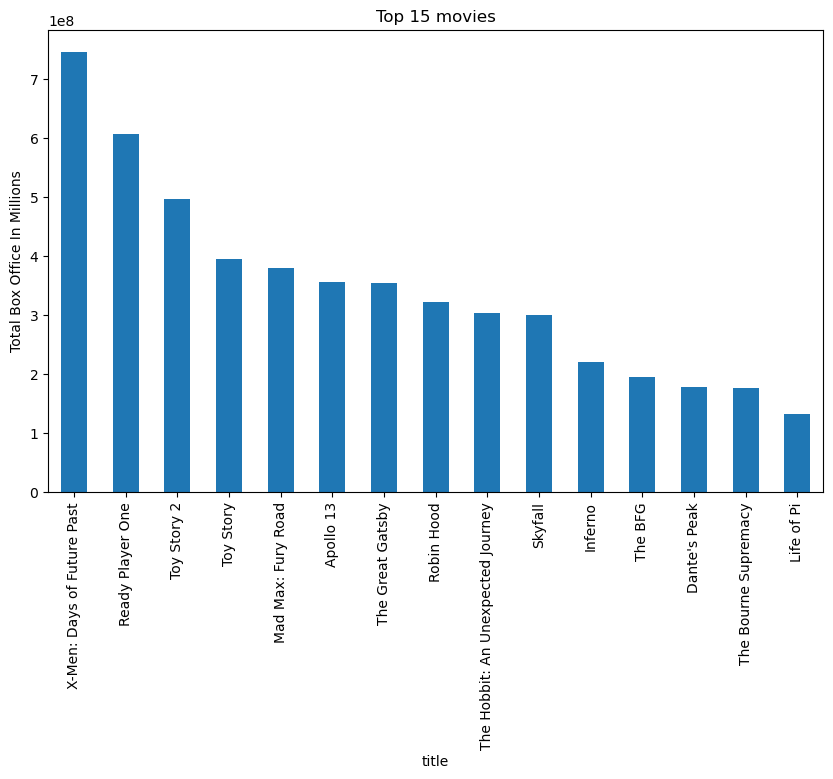

In [154]:
studio_box_office = zaza_subset.groupby('title')['box_office'].sum()

top_15_studios = studio_box_office.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
top_15_studios.plot(kind='bar')
plt.title('Top 15 movies')
plt.xlabel('title')
plt.ylabel('Total Box Office In Millions')
plt.xticks(rotation=90)
plt.show()


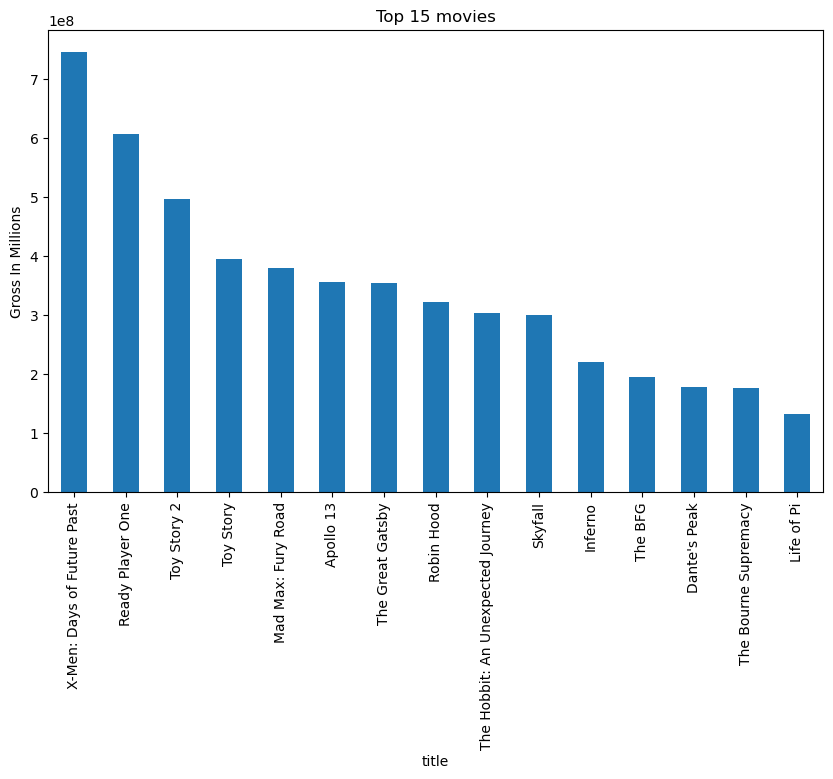

In [155]:
grossing = zaza_subset.groupby('title')['total_gross'].sum()

top_15_gross = studio_box_office.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
top_15_studios.plot(kind='bar')
plt.title('Top 15 movies')
plt.xlabel('title')
plt.ylabel('Gross In Millions')
plt.xticks(rotation=90)
plt.show()

In [156]:
print(zaza_subset.columns)

Index(['id_x', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio', 'Unnamed: 0', 'genre_ids', 'id_y', 'original_language',
       'movie', 'popularity', 'title', 'vote_average', 'vote_count', 'id',
       'release_date', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'total_gross'],
      dtype='object')


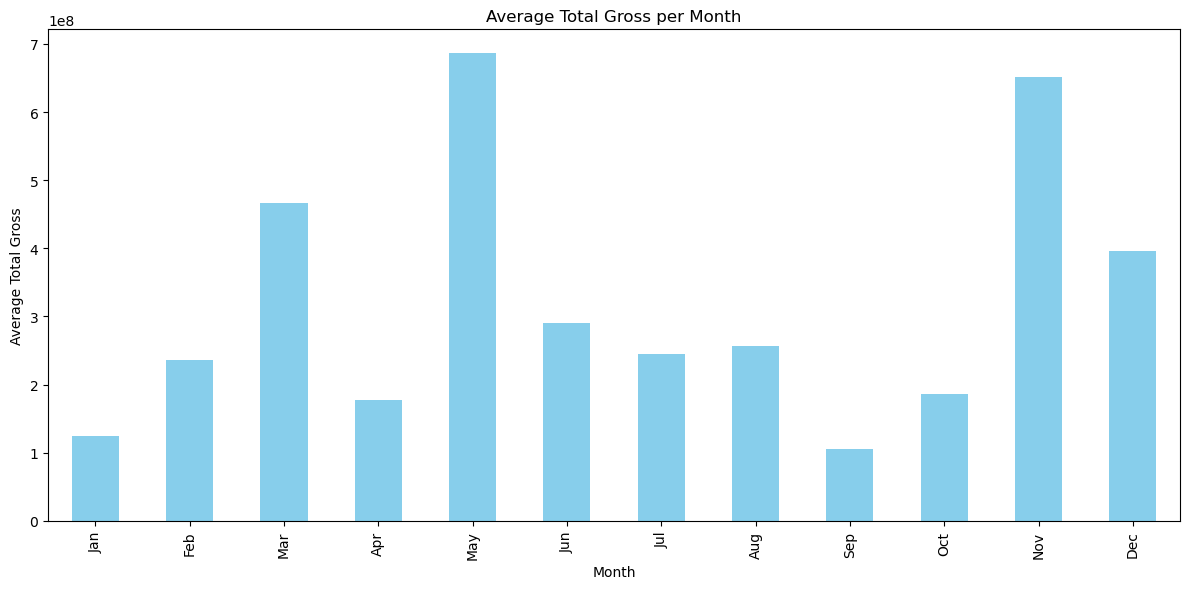

In [157]:
zaza_subset['release_date'] = pd.to_datetime(zaza_subset['release_date'])

# Extract month from release_date
zaza_subset['month'] = zaza_subset['release_date'].dt.month

# Calculate the average total_gross for each month
avg_gross_per_month = zaza_subset.groupby('month')['total_gross'].mean()

# Plotting
plt.figure(figsize=(12, 6))
avg_gross_per_month.plot(kind='bar', color='skyblue')
plt.title('Average Total Gross per Month')
plt.xlabel('Month')
plt.ylabel('Average Total Gross')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

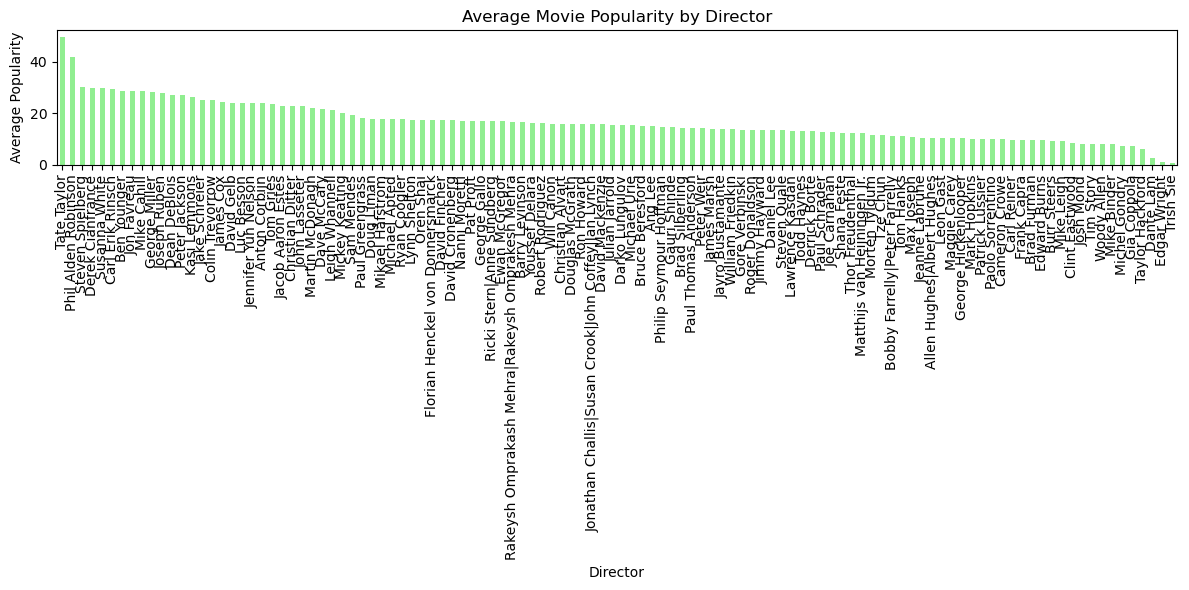

In [158]:
# Calculate the average popularity for each director
avg_popularity_per_director = zaza_subset.groupby('director')['popularity'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
avg_popularity_per_director.plot(kind='bar', color='lightgreen')
plt.title('Average Movie Popularity by Director')
plt.xlabel('Director')
plt.ylabel('Average Popularity')
plt.tight_layout()
plt.show()

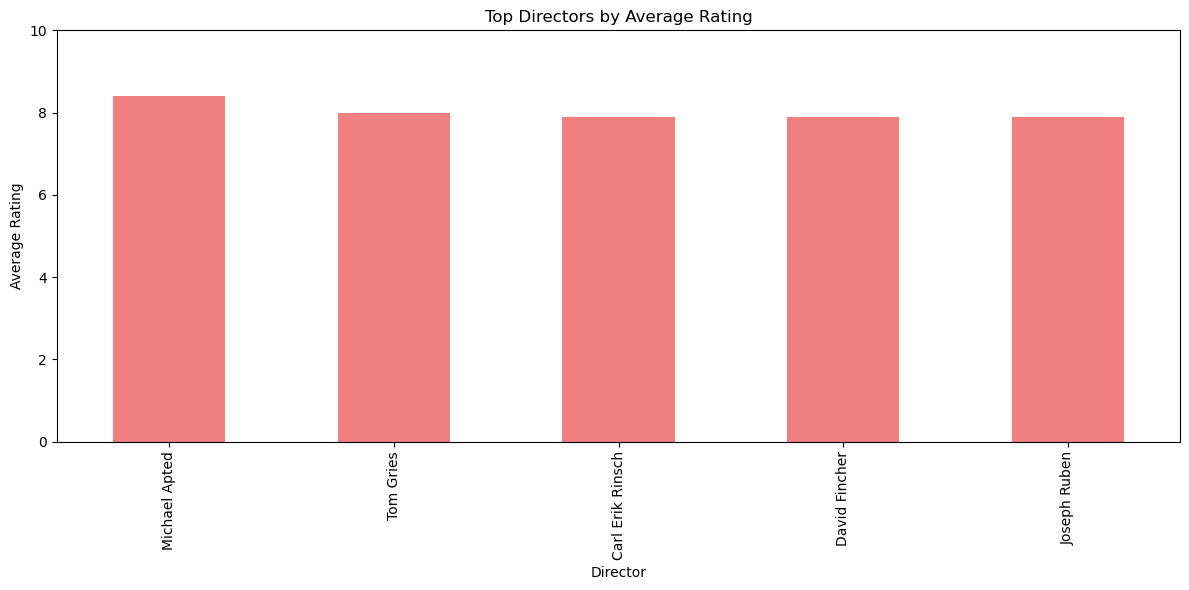

In [159]:
# Calculate the average rating for each director and pick top N (e.g., 5)
N = 5
top_directors = zaza_subset.groupby('director')['vote_average'].mean().nlargest(N)

# Plotting
plt.figure(figsize=(12, 6))
top_directors.plot(kind='bar', color='lightcoral')
plt.title('Top Directors by Average Rating')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.ylim(0, 10)  # Assuming ratings are out of 10
plt.tight_layout()
plt.show()

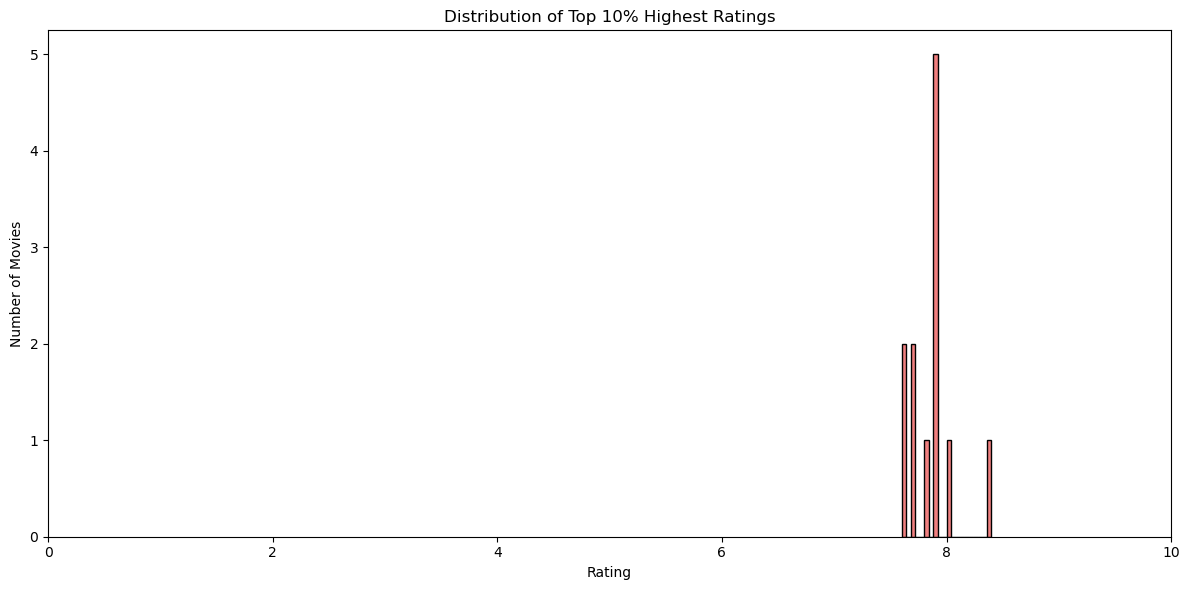

In [160]:
quantile_90 = zaza_subset['vote_average'].quantile(0.90)
highest_ratings = zaza_subset[zaza_subset['vote_average'] > quantile_90]['vote_average']

plt.figure(figsize=(12, 6))
plt.hist(highest_ratings, bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Top 10% Highest Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.xlim(0, 10)  # Assuming ratings are out of 10
plt.tight_layout()
plt.show()
#SOS violin plot here

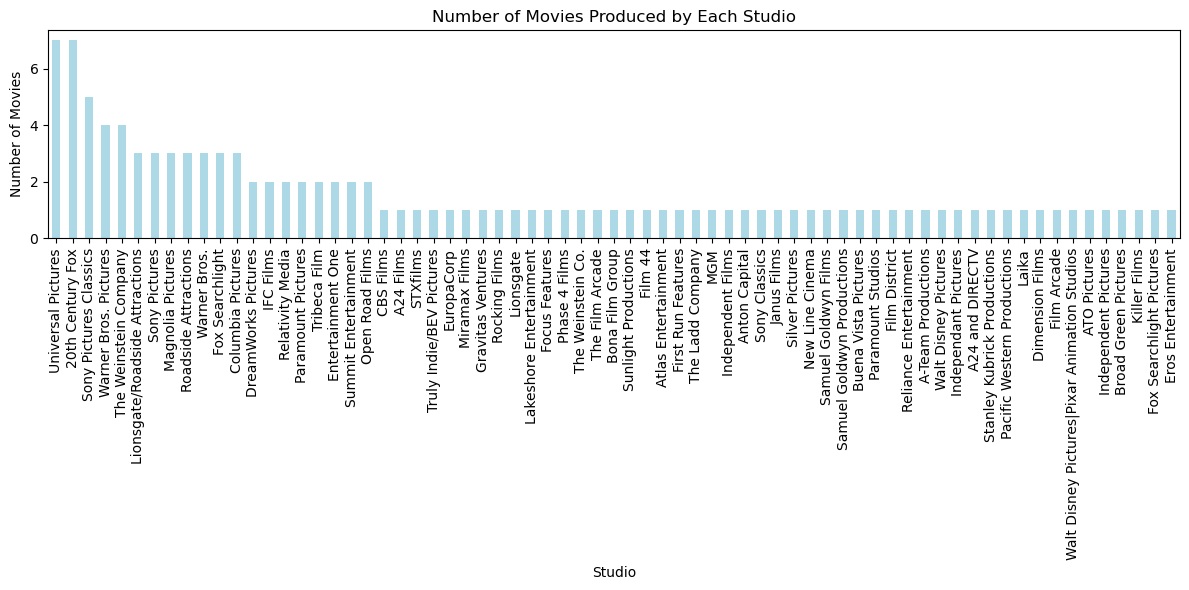

In [161]:
studio_counts = zaza_subset['studio'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
studio_counts.plot(kind='bar', color='lightblue')
plt.title('Number of Movies Produced by Each Studio')
plt.xlabel('Studio')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

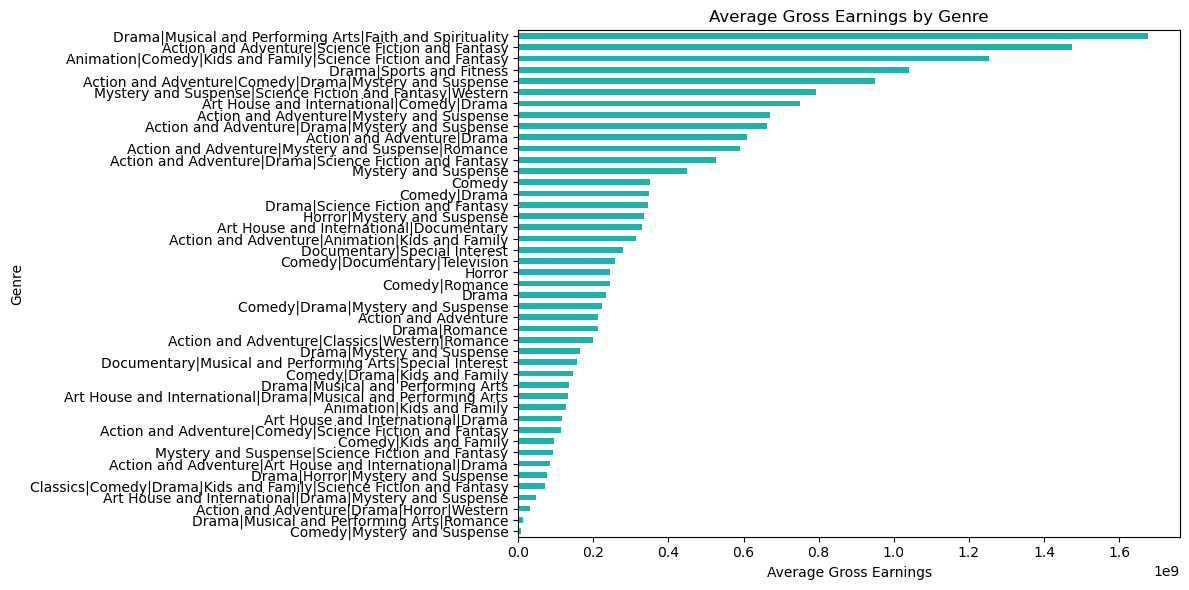

In [162]:
# Calculate the average total_gross for each genre
# If you want total instead of average, replace 'mean' with 'sum'
average_gross_per_genre = zaza_subset.groupby('genre')['total_gross'].mean()

# Plotting
plt.figure(figsize=(12, 6))
average_gross_per_genre.sort_values(ascending=True).plot(kind='barh', color='lightseagreen')  # horizontal bar chart for better readability
plt.title('Average Gross Earnings by Genre')
plt.xlabel('Average Gross Earnings')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()